# **1. Reviewing the new dataset**

---

In [1]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

pd.set_option('display.max_columns', None)

# Đọc dữ liệu
df = pd.read_csv('dataset/data_EDA.csv')

In [2]:
df.head()

Rating                           Company Name         Location  \
0     3.8                      Tecolote Research  Albuquerque, NM   
1     3.4  University of Maryland Medical System    Linthicum, MD   
2     4.8                                KnowBe4   Clearwater, FL   
3     3.8                                   PNNL     Richland, WA   
4     2.9                     Affinity Solutions     New York, NY   

     Headquarters                    Size   Type of ownership  \
0      Goleta, CA   501 to 1000 employees   Company - Private   
1   Baltimore, MD        10000+ employees  Other Organization   
2  Clearwater, FL   501 to 1000 employees   Company - Private   
3    Richland, WA  1001 to 5000 employees          Government   
4    New York, NY     51 to 200 employees   Company - Private   

                           Industry                        Sector  \
0               Aerospace & Defense           Aerospace & Defense   
1  Health Care Services & Hospitals                   Health Care   
2                 Security Services             Business Services   
3                            Energy  Oil, Gas, Energy & Utilities   
4           Advertising & Marketing             Business Services   

                            Revenue  job_simplified seniority  Min Salary  \
0         $50 to $100 million (USD)  data scientist     Other       53000   
1            $2 to $5 billion (USD)  data scientist     Other       63000   
2        $100 to $500 million (USD)  data scientist     Other       80000   
3  $500 million to $1 billion (USD)  data scientist     Other       56000   
4                           Unknown  data scientist     Other       86000   

   Max Salary  Average Salary  Python_yn  Spark  AWS_yn  Excel_yn  Tableau_yn  \
0       91000         72000.0          1      0       0         1           1   
1      112000         87500.0          1      0       0         0           0   
2       90000         85000.0          1      1       0         1           0   
3       97000         76500.0          1      0       0         0           0   
4      143000        114500.0          1      0       0         1           0   

   SQL_yn Rating Category job_state  same_state  Age  
0       0   Medium Rating        NM           0   50  
1       0   Medium Rating        MD           0   39  
2       1     High Rating        FL           1   13  
3       0   Medium Rating        WA           1   58  
4       1      Low Rating        NY           1   25

In [3]:
df.shape

(742, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             742 non-null    float64
 1   Company Name       742 non-null    object 
 2   Location           742 non-null    object 
 3   Headquarters       742 non-null    object 
 4   Size               742 non-null    object 
 5   Type of ownership  742 non-null    object 
 6   Industry           742 non-null    object 
 7   Sector             742 non-null    object 
 8   Revenue            742 non-null    object 
 9   job_simplified     742 non-null    object 
 10  seniority          742 non-null    object 
 11  Min Salary         742 non-null    int64  
 12  Max Salary         742 non-null    int64  
 13  Average Salary     742 non-null    float64
 14  Python_yn          742 non-null    int64  
 15  Spark              742 non-null    int64  
 16  AWS_yn             742 non

In [5]:
df.describe()

Rating     Min Salary     Max Salary  Average Salary   Python_yn  \
count  742.000000     742.000000     742.000000      742.000000  742.000000   
mean     3.633693   74771.752022  128226.900270   101499.326146    0.528302   
std      0.720715   30926.957646   45110.814223    37463.032093    0.499535   
min      0.000000   15000.000000   16000.000000    15500.000000    0.000000   
25%      3.300000   52000.000000   96000.000000    73500.000000    0.000000   
50%      3.700000   69500.000000  124000.000000    97500.000000    1.000000   
75%      4.000000   91000.000000  155000.000000   122500.000000    1.000000   
max      5.000000  202000.000000  306000.000000   254000.000000    1.000000   

            Spark      AWS_yn    Excel_yn  Tableau_yn      SQL_yn  same_state  \
count  742.000000  742.000000  742.000000  742.000000  742.000000  742.000000   
mean     0.225067    0.237197    0.522911    0.199461    0.512129    0.557951   
std      0.417908    0.425651    0.499812    0.399865    0.500190    0.496965   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    1.000000    1.000000   
75%      0.000000    0.000000    1.000000    0.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Age  
count  742.000000  
mean    49.389488  
std     53.962906  
min     -1.000000  
25%     14.000000  
50%     27.000000  
75%     62.000000  
max    279.000000

# **2. Visualization**

---

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

sns.set_theme(style="whitegrid")

In [7]:
font_tit = {'fontsize': 14, 'fontweight': 'bold'}
font_ax  = {'fontsize': 12, 'fontweight': 'bold', 'style': 'italic'}
font_txt = {'fontsize': 10, 'fontweight': 'bold', 'color': 'black'}

cmap10   = ['#00429d', '#3e67ae', '#618fbf', '#85b7ce', '#b1dfdb', '#ffcab9', '#fd9291', '#e75d6f', '#c52a52', '#93003a']
cmapGrad = ["#750e13", "#a2191f", "#da1e28", "#fa4d56", "#ff8389", "#ffb3b8", "#ffd7d9", "#fff1f1", "#e5f6ff", "#bae6ff", "#82cfff", "#33b1ff", "#1192e8", "#0072c3", "#00539a", "#003a6d"]

## **2.1. Eploratory (Univariate Analysis)**

In [8]:
continuous_cols = ['Min Salary', 'Max Salary', 'Average Salary', 'Rating', 'Age']
discrete_cols   = ['Python_yn', 'Spark', 'AWS_yn', 'Excel_yn', 'Tableau_yn', 'SQL_yn', 'same_state']

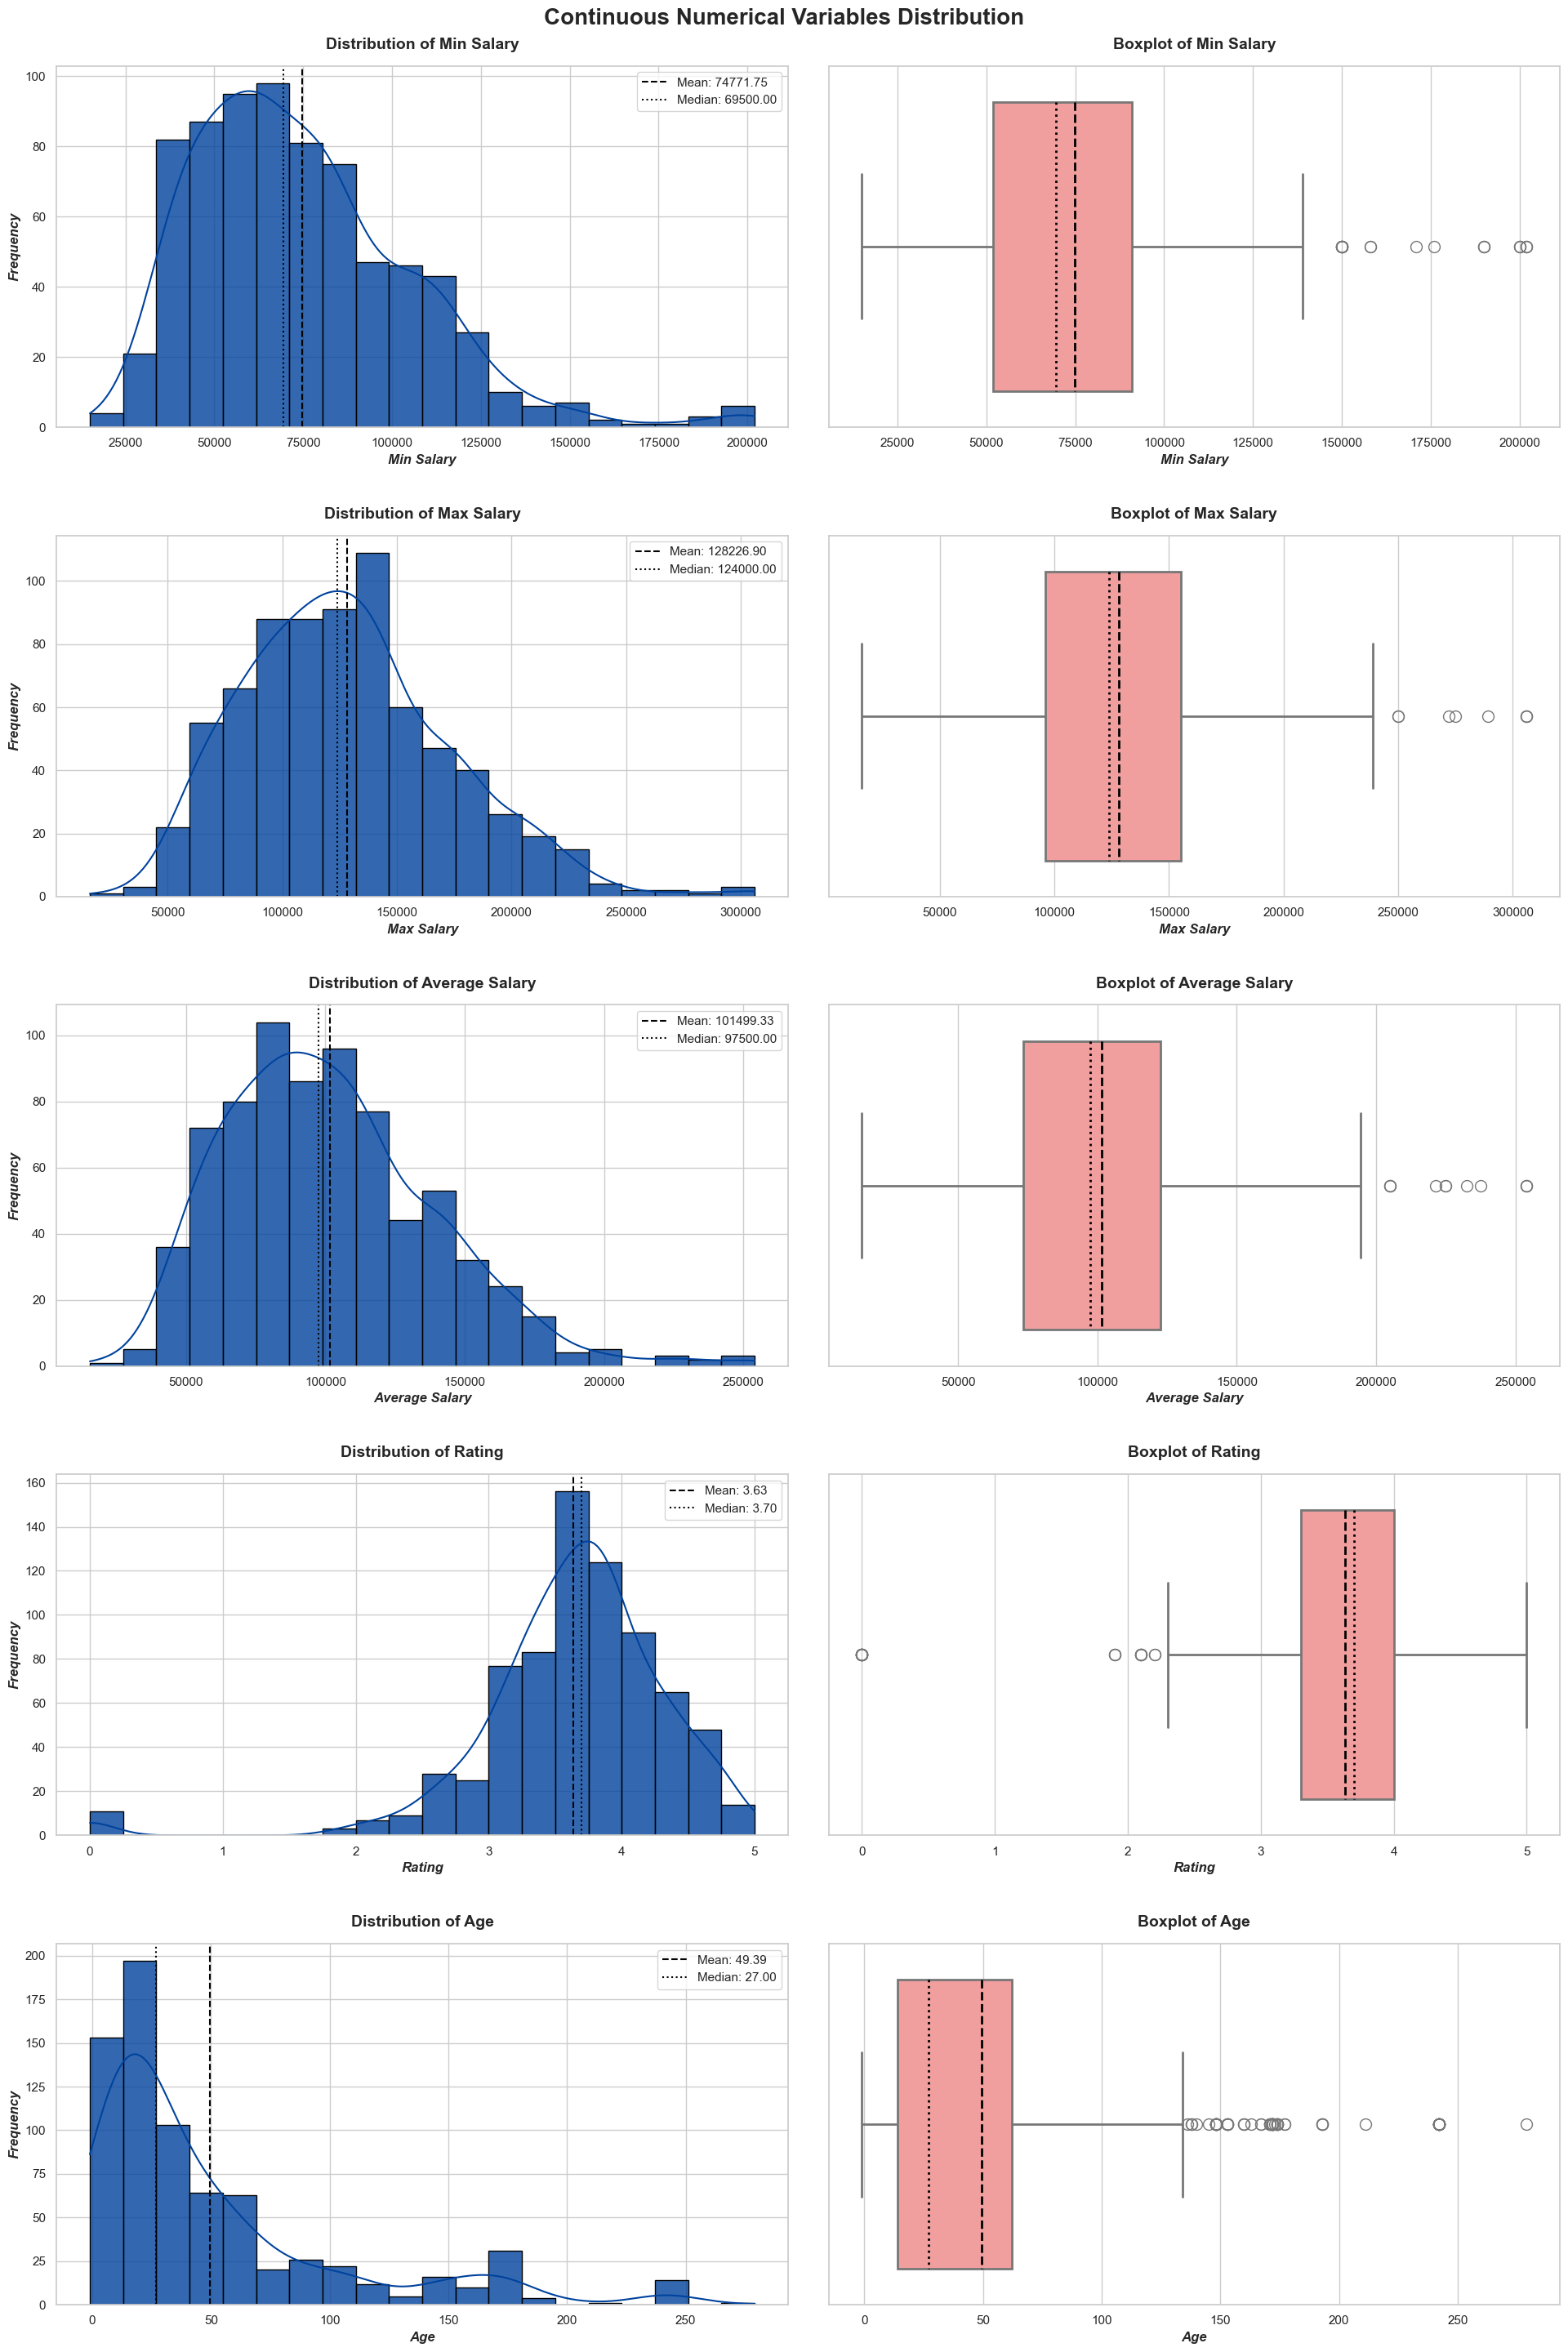

In [9]:
fig, axes = plt.subplots(5, 2, figsize=(20, 30))

for idx, col in enumerate(continuous_cols):
    sns.histplot(df[col], ax=axes[idx, 0], kde=True, bins=20, color=cmap10[0], alpha=0.8, edgecolor='black')

    mean_val   = df[col].mean()
    median_val = df[col].median()
    axes[idx, 0].axvline(mean_val  , color='black', linestyle='--'    , label=f'Mean: {mean_val:.2f}')
    axes[idx, 0].axvline(median_val, color='black', linestyle='dotted', label=f'Median: {median_val:.2f}')
    axes[idx, 0].legend()

    axes[idx, 0].set_title(f'Distribution of {col}', fontdict=font_tit, pad=15)
    axes[idx, 0].set_xlabel(col, fontdict=font_ax)
    axes[idx, 0].set_ylabel('Frequency', fontdict=font_ax)

    sns.boxplot(data=df, x=col, ax=axes[idx, 1], color=cmap10[6],
                fliersize=10, linewidth=2, showmeans=True, meanline=True,
                meanprops={'color': 'black', 'linestyle': '--', 'linewidth': 2},
                medianprops={'color': 'black', 'linestyle': 'dotted', 'linewidth': 2})

    axes[idx, 1].set_title(f'Boxplot of {col}', fontdict=font_tit, pad=15)
    axes[idx, 1].set_xlabel(col, fontdict=font_ax)

plt.suptitle('Continuous Numerical Variables Distribution', y=0.97, fontsize=20, fontweight='bold')
plt.tight_layout(pad=3)
plt.show()

## 1. Distribution and Boxplot of **Min Salary**

- **Distribution**  
  - The distribution of minimum salary is roughly normal but slightly right-skewed.  
  - **Mean:** 74,771.75 &nbsp;&nbsp; **Median:** 69,500.00  
  - Most values fall within the range of 50,000 to 100,000.  
  - Some outliers exist above 150,000.

- **Boxplot**  
  - The boxplot shows that most data points lie between 50,000 and 100,000.  
  - Several high-value outliers are present above 150,000.

- **Remarks**  
  - The mean and median are fairly close, suggesting a relatively balanced distribution with a few high-value outliers.

---

## 2. Distribution and Boxplot of **Max Salary**

- **Distribution**  
  - The distribution is also nearly normal with slight right skew.  
  - **Mean:** 128,226.90 &nbsp;&nbsp; **Median:** 124,000.00  
  - Most values are between 80,000 and 150,000.  
  - Outliers can be seen above 200,000.

- **Boxplot**  
  - The main range falls between 80,000 and 160,000.  
  - A few values exceed 200,000.

- **Remarks**  
  - Similar to min salary, the distribution is fairly balanced but includes high-end outliers.

---

## 3. Distribution and Boxplot of **Average Salary**

- **Distribution**  
  - Similar shape to min and max salary; slightly right-skewed.  
  - **Mean:** 101,499.33 &nbsp;&nbsp; **Median:** 97,500.00  
  - Most values fall between 70,000 and 120,000.  
  - Several values are above 200,000.

- **Boxplot**  
  - Most values lie within 70,000–120,000.  
  - Some high outliers are observed above 200,000.

- **Remarks**  
  - The average salary mirrors the trends of min and max salary distributions, with a few high outliers.

---

## 4. Distribution and Boxplot of **Rating**

- **Distribution**  
  - The distribution is close to normal, slightly left-skewed.  
  - **Mean:** 3.63 &nbsp;&nbsp; **Median:** 3.70  
  - Most values range between 3.0 and 4.0.  
  - Some outliers are below 2 and above 4.5.

- **Boxplot**  
  - Values mostly lie between 3 and 4.  
  - Outliers are present at both low (<2) and high (>4.5) ends.

- **Remarks**  
  - Ratings are concentrated in the 3–4 range with occasional outliers on both extremes.

---

## 5. Distribution and Boxplot of **Age (Company Age)**

- **Distribution**  
  - The distribution is heavily right-skewed.  
  - **Mean:** 49.39 &nbsp;&nbsp; **Median:** 27.00  
  - Most values fall under 50 years, but some are above 100.

- **Boxplot**  
  - Most data is concentrated between 20 and 50.  
  - Several extreme values exceed 100.

- **Remarks**  
  - Company age shows a strong right skew, with the majority being relatively young and a few exceptionally old.

---

## 6. Summary

- Salary-related features (**Min**, **Max**, and **Average Salary**) show balanced distributions with high-end outliers.
- **Rating** is normally distributed, mostly between 3 and 4, with a few outliers.
- **Age** is highly right-skewed, suggesting most companies are young with a few significantly older outliers.

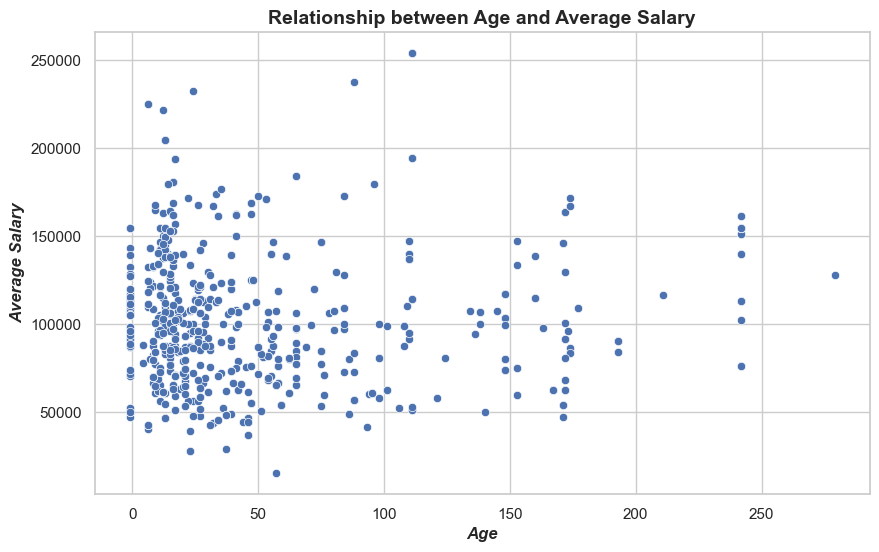

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Average Salary', data=df)
plt.title('Relationship between Age and Average Salary', fontdict=font_tit)
plt.xlabel('Age', fontdict=font_ax)
plt.ylabel('Average Salary', fontdict=font_ax)
plt.show()

## 1. Overview

This scatter plot illustrates the relationship between a company's **age** (x-axis) and its **average salary** offered to employees (y-axis).

---

## 2. Key Observations

- **Young Companies (0–50 years old):**
  - Most companies fall within the **0 to 50 years** range.
  - Their average salaries range from **$50,000 to $150,000**, with some outliers paying over **$200,000**.

- **Older Companies (>50 years old):**
  - A few companies are over **100 years** old, even exceeding **200 years**.
  - The salaries among these companies are **widely spread**, showing no clear concentration at any specific level.

- **High Salaries:**
  - There is **no obvious trend** suggesting that older companies pay more or less.
  - Both young and old companies can offer **high salaries**.

- **Data Dispersion:**
  - The **older** the company, the **more dispersed** the salary data becomes.
  - There is no clear correlation between **company age** and **average salary**.

---

## 3. Conclusion

- There is **no clear linear relationship** between a company's age and the average salary it offers.
- **Younger companies (under 50 years)** dominate the dataset and tend to have relatively consistent salary levels.
- **Very old companies** (over 100 years) may need to be examined more closely, as they could include large corporations, non-profits, or **possibly contain erroneous data**.

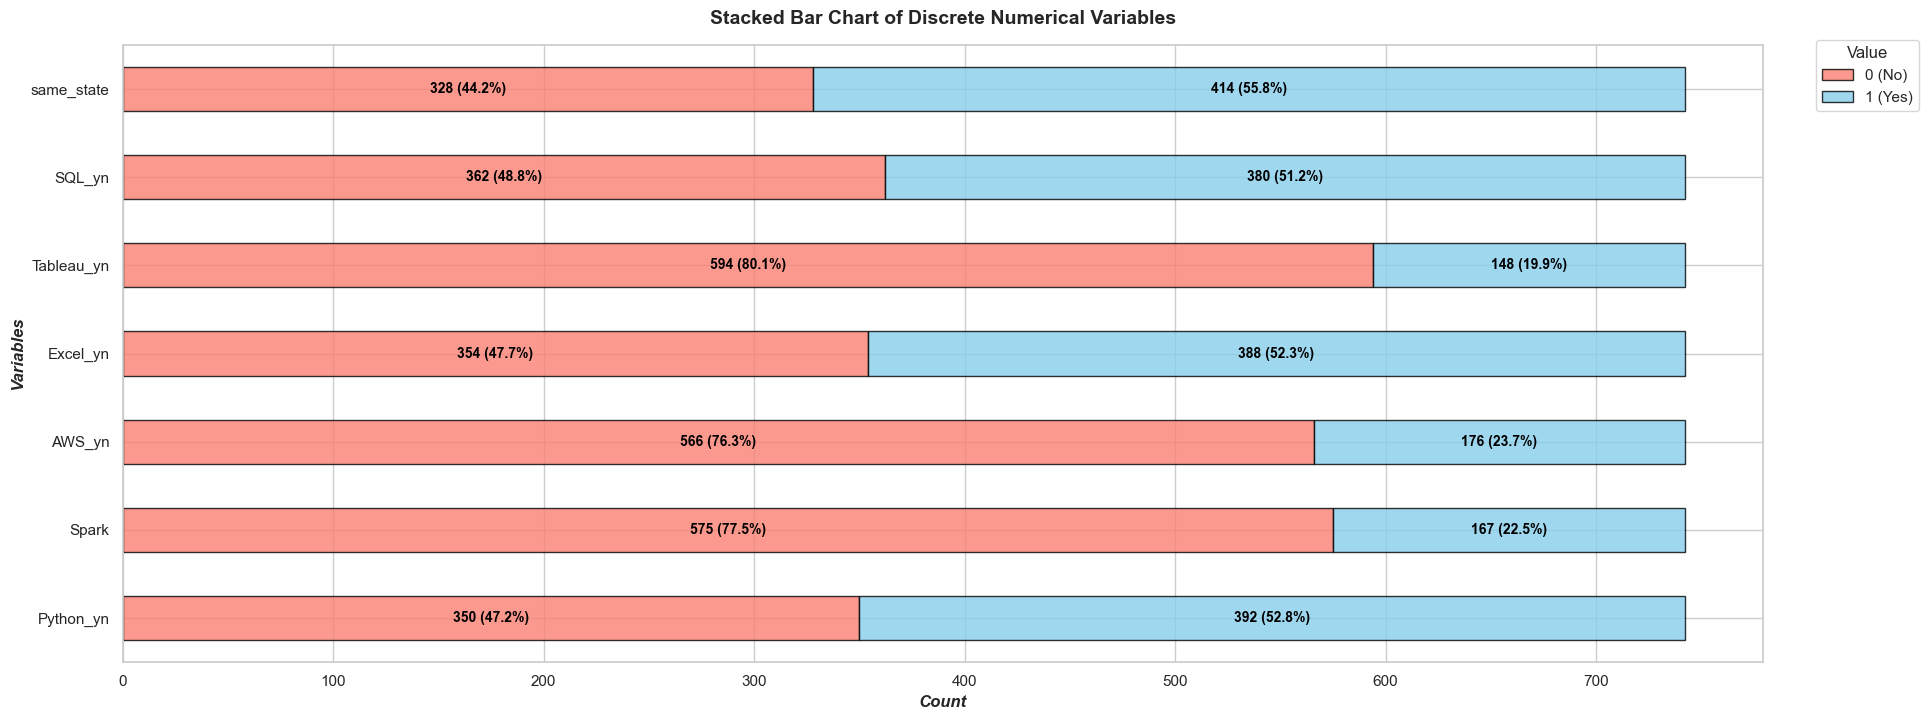

In [11]:
counts         = df[discrete_cols].apply(pd.Series.value_counts).T
counts.columns = ['Count 0', 'Count 1']
percentages    = counts.div(counts.sum(axis=1), axis=0) * 100

_, ax = plt.subplots(figsize=(20, 8))
counts.plot(kind='barh', stacked=True, ax=ax, alpha=0.8, edgecolor='black', color=['salmon', 'skyblue'])

for i, (pct_0, pct_1, cnt_0, cnt_1) in enumerate(zip(percentages['Count 0'], percentages['Count 1'], counts['Count 0'], counts['Count 1'])):
    ax.text(cnt_0 / 2, i        , f'{cnt_0} ({pct_0:.1f}%)', va='center', ha='center', fontdict=font_txt)
    ax.text(cnt_0 + cnt_1 / 2, i, f'{cnt_1} ({pct_1:.1f}%)', va='center', ha='center', fontdict=font_txt)

plt.title('Stacked Bar Chart of Discrete Numerical Variables', fontdict=font_tit, pad=15)
plt.xlabel('Count', fontdict=font_ax)
plt.ylabel('Variables', fontdict=font_ax)
plt.legend(['0 (No)', '1 (Yes)'], title='Value', loc='upper right', bbox_to_anchor=(1.1, 1.02))

plt.tight_layout(pad=3)
plt.show()

## Distribution of Binary Categorical Variables

This stacked bar chart shows the distribution of binary categorical variables (0 or 1).

---

### 1. `same_state`
- **Values:**
  - **0 (No):** 328 (44.2%)
  - **1 (Yes):** 414 (55.8%)
- **Observation:** The majority of values fall in the "Yes" group, indicating that more than half of respondents work in the same state.

---

### 2. `SQL_yn`
- **Values:**
  - **0 (No):** 362 (48.8%)
  - **1 (Yes):** 380 (51.2%)
- **Observation:** The distribution between "Yes" and "No" is relatively balanced, with a slight preference for "Yes", suggesting that nearly half of the respondents possess SQL skills.

---

### 3. `Tableau_yn`
- **Values:**
  - **0 (No):** 594 (80.1%)
  - **1 (Yes):** 148 (19.9%)
- **Observation:** The majority of responses fall in the "No" category, indicating that only a small portion of participants have Tableau skills.

---

### 4. `Excel_yn`
- **Values:**
  - **0 (No):** 354 (47.7%)
  - **1 (Yes):** 388 (52.3%)
- **Observation:** The distribution is quite balanced, with a slight lean towards "Yes", showing that Excel is a slightly more common skill among respondents.

---

### 5. `AWS_yn`
- **Values:**
  - **0 (No):** 566 (76.3%)
  - **1 (Yes):** 176 (23.7%)
- **Observation:** Most values are in the "No" group, indicating that only a minority of respondents have AWS-related skills.

---

### 6. `Spark`
- **Values:**
  - **0 (No):** 575 (77.5%)
  - **1 (Yes):** 167 (22.5%)
- **Observation:** Similar to AWS, a large majority of respondents do not have Spark skills, with most responses being "No".

---

### 7. `Python_yn`
- **Values:**
  - **0 (No):** 350 (47.2%)
  - **1 (Yes):** 392 (52.8%)
- **Observation:** The distribution is fairly even, with a slight majority having Python skills, indicating its relative popularity.

---

## Summary

- The most **common skills** (with "Yes" rates above 50%) are: **Python**, **Excel**, and **SQL**.
- The **less common skills** (with "Yes" rates below 50%) include: **Tableau**, **AWS**, and **Spark**.
- For the variable `same_state`, **more than half** of the surveyed individuals work in the same state.


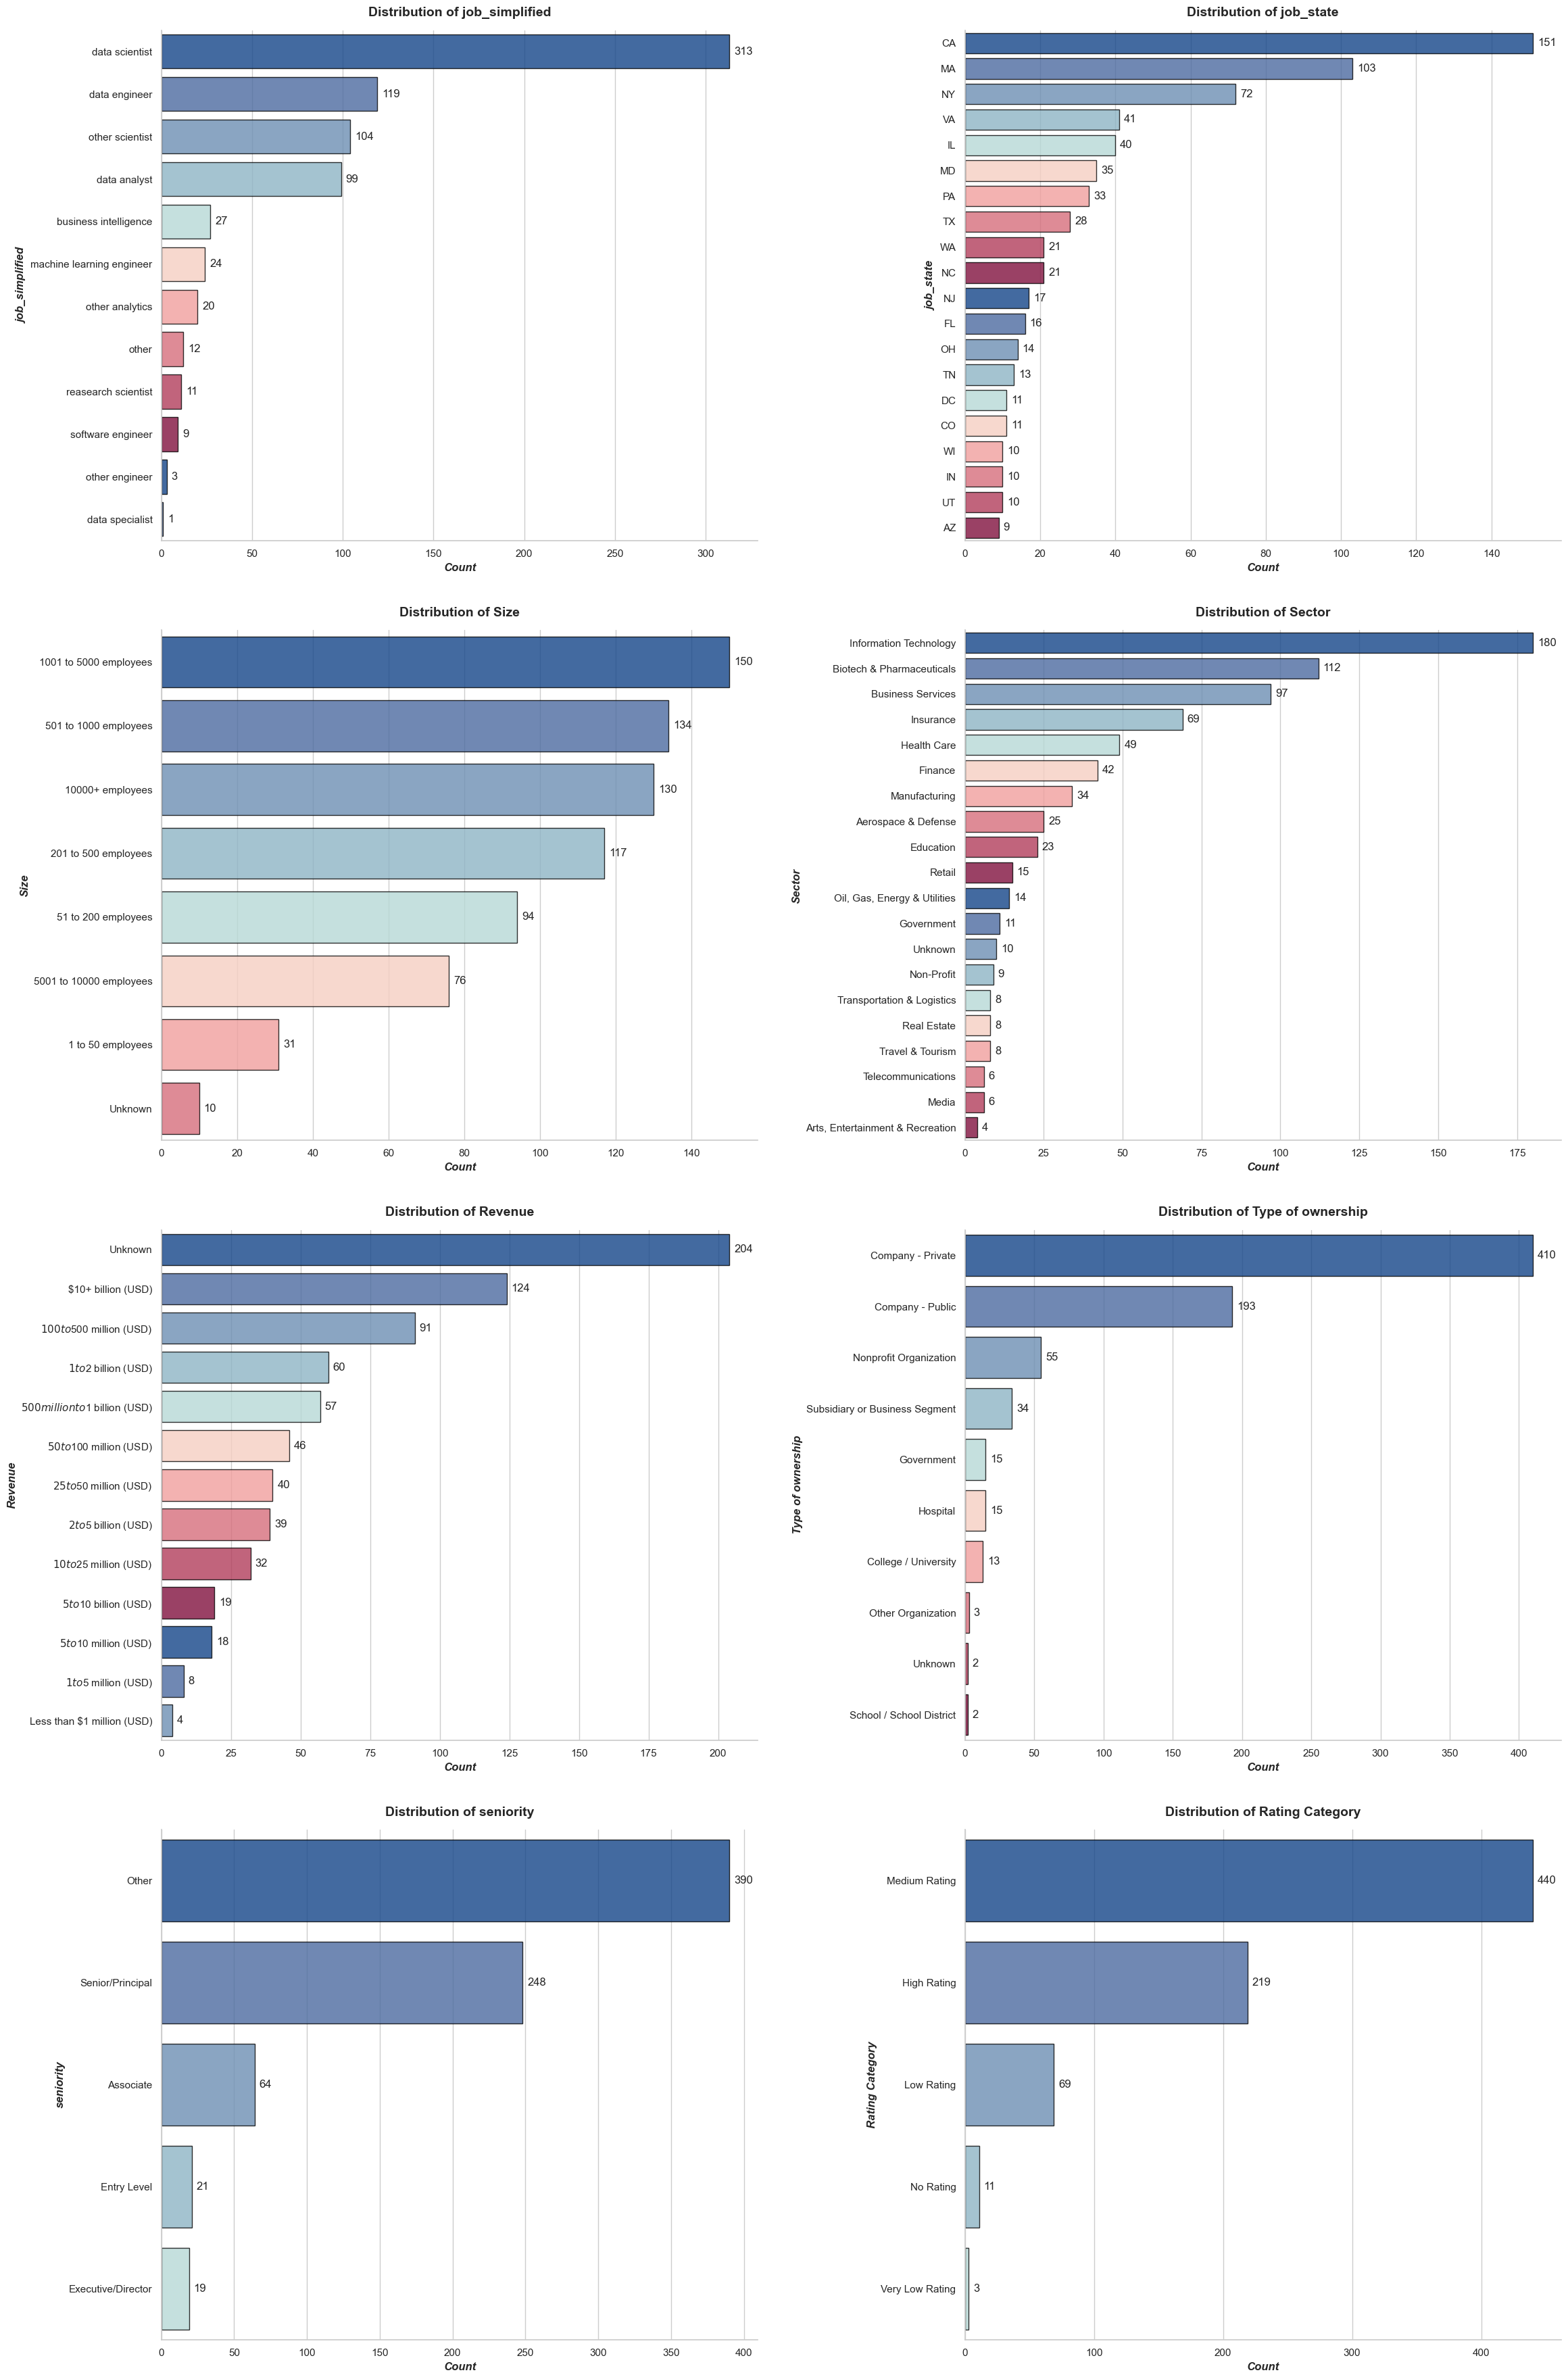

In [12]:
object_columns = ['job_simplified', 'job_state', 'Size', 'Sector', 'Revenue',
                  'Type of ownership', 'seniority', 'Rating Category']
fig, axes = plt.subplots(4, 2, figsize=(24, 36))

for col, ax in zip(object_columns, axes.ravel()):
    value_counts = df[col].value_counts().head(20)

    sns.barplot(y=value_counts.index, x=value_counts.values, ax=ax, palette=cmap10, alpha=0.8, edgecolor='black')
    ax.set_title(f'Distribution of {col}', fontdict=font_tit, pad=15)
    ax.set_xlabel('Count', fontdict=font_ax)
    ax.set_ylabel(col, fontdict=font_ax)

    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=5)

sns.despine(top=True, right=True)
plt.tight_layout(pad=3)
plt.show()

## Job Market Distribution Overview

This section presents the distribution of key job-related variables in the form of bar charts and counts.

---

### 1. **Job Role Distribution (`Job Simplified`)**
- **Data Scientist** is the most common role with **313 positions**, significantly higher than others.
- Other notable roles include **Data Engineer** (119), **Other Scientist** (104), and **Data Analyst** (99).
- Less common roles include **Software Engineer** (9) and **Other Engineer** (8).

---

### 2. **Job Distribution by State (`Job State`)**
- **California (CA)** leads with **151 jobs**, followed by **Massachusetts (MA)** with **103**, and **New York (NY)** with **72**.
- Other states like **Virginia (VA)**, **Illinois (IL)**, and **Texas (TX)** have fewer jobs in comparison.

---

### 3. **Company Size Distribution (`Size`)**
- Companies with **1001–5000 employees** account for the highest number (**150**).
- Companies with **501–1000** employees (134) and those with **10,000+** employees (130) are also well represented.
- Smaller companies (**1–50 employees**) and **unknown sizes** have the lowest counts.

---

### 4. **Sector Distribution (`Sector`)**
- **Information Technology** is the most represented sector with **180 jobs**, followed by **Biotech & Pharmaceuticals** (112) and **Business Services** (97).
- Less represented sectors include **Real Estate**, **Media**, and **Entertainment**.

---

### 5. **Revenue Distribution (`Revenue`)**
- **Unknown revenue** accounts for the largest share (**204 companies**).
- Companies with revenues over **$10 billion** also have a significant presence (**124 companies**).
- Companies with lower revenues (e.g., under **$1 million**) are rare.

---

### 6. **Ownership Type Distribution (`Type of Ownership`)**
- **Private companies** dominate the dataset (**410 companies**), followed by **Public companies** (**193**).
- **Non-profits** (55) and **Government organizations** (15) are much less common.

---

### 7. **Seniority Distribution (`Seniority`)**
- The **"Other"** category dominates with **390 positions**, followed by **Senior/Principal** roles (**248**).
- Lower-level roles like **Associate** (64) and **Entry Level** (21) are less common.
- **Executive/Director** roles are the rarest, with only **2 entries**.

---

### 8. **Company Rating Distribution (`Rating Category`)**
- **Medium Rating** companies are the most frequent (**440**).
- **High Rating** companies number **219**, while **Low Rating** ones total just **69**.
- Companies with **no or very low ratings** are negligible.

---

## Summary

This chart reveals that:
- **Data Scientist** is the most in-demand role, concentrated in large states like **California** and **Massachusetts**.
- **Large companies** and sectors such as **Information Technology** and **Biotech** dominate the market.
- Most companies are **privately owned** and fall into the **medium-to-high rating** categories.
- The demand is skewed toward **senior-level positions**, indicating a strong need for experienced talent.

This overview provides a comprehensive look at the data job market and can inform both **trend analysis** and **career development strategies**.


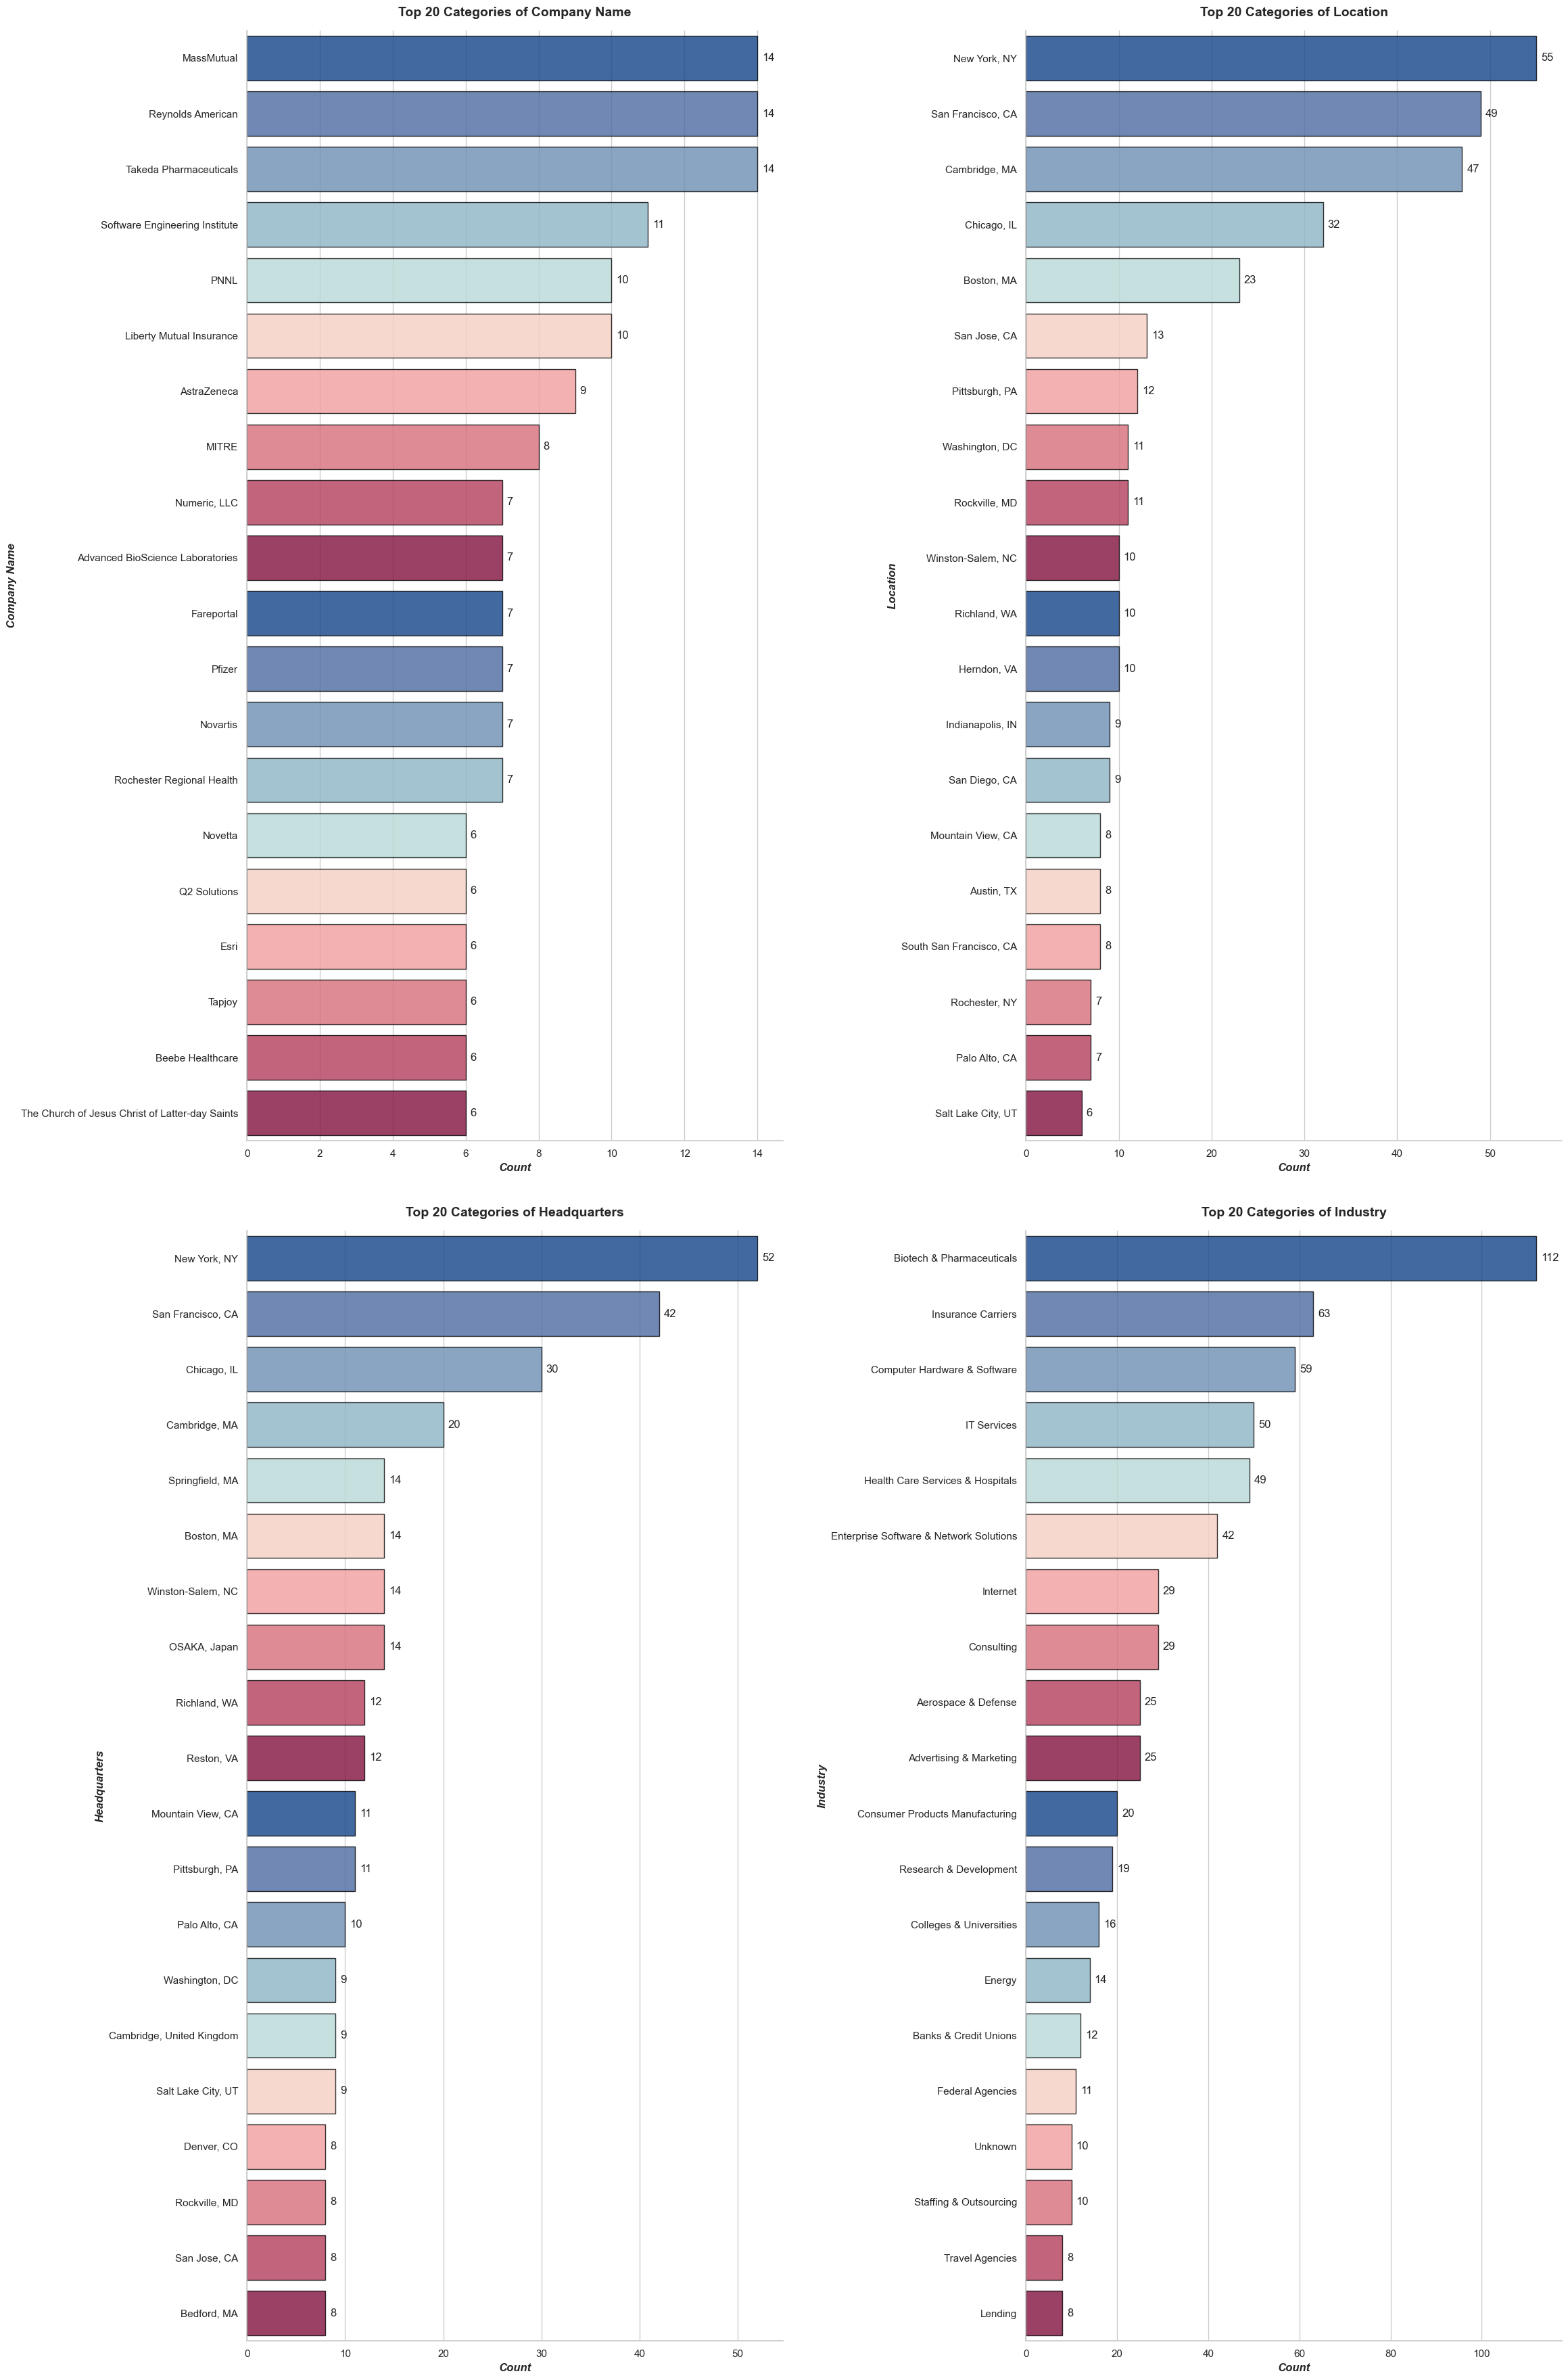

In [13]:
all_object_columns = df.select_dtypes(include=['object']).columns

excluded_object_columns = [col for col in all_object_columns if col not in object_columns]

fig, axes = plt.subplots(2, 2, figsize=(24, 36))

for col, ax in zip(excluded_object_columns, axes.ravel()):
    value_counts = df[col].value_counts().head(20)

    sns.barplot(y=value_counts.index, x=value_counts.values, ax=ax, palette=cmap10, alpha=0.8, edgecolor='black')
    ax.set_title(f'Top 20 Categories of {col}', fontdict=font_tit, pad=15)
    ax.set_xlabel('Count', fontdict=font_ax)
    ax.set_ylabel(col, fontdict=font_ax)

    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=5)

sns.despine(top=True, right=True)
plt.tight_layout(pad=3)
plt.show()

### **1. Top 20 Company Names**
- **MassMutual**, **Reynolds American**, and **Takeda Pharmaceuticals** are the leading companies on the list, each with 14 entries.  
- Other notable companies include **Software Engineering Institute** (11), **PNNL** (10), and **Liberty Mutual Insurance** (10).  
- Companies with fewer entries but still in the top 20 include **Novetta**, **Q2 Solutions**, **Esri**, and **Teiphy** (6 entries each).  
- This list features companies from various sectors including insurance, pharmaceuticals, technology, and research.

---

### **2. Top 20 Job Locations**
- **New York, NY** has the highest number of job postings (55), followed by **San Francisco, CA** (49) and **Cambridge, MA** (47).  
- Other major cities include **Chicago, IL** (32), **Boston, MA** (23), and **San Jose, CA** (13).  
- Less common but notable locations include **Austin, TX** (8), **South San Francisco, CA** (8), and **Salt Lake City, UT** (6).

---

### **3. Top 20 Headquarters**
- **New York, NY** leads with 52 companies headquartered there.  
- **San Francisco, CA** (42) and **Chicago, IL** (30) hold the next top spots.  
- **Cambridge, MA** (20), **Springfield, MA** (14), and **Boston, MA** (14) also play significant roles in hosting company headquarters.  
- Some international locations such as **Osaka, Japan** (14) and **Cambridge, United Kingdom** (9) also appear in the list.

---

### **4. Top 20 Industries**
- **Biotech & Pharmaceuticals** is the top industry with 112 job postings.  
- **Insurance Carriers** (63), **Computer Hardware & Software** (59), and **IT Services** (50) are other dominant sectors.  
- Other high-volume industries include **Health Care Services & Hospitals** (49) and **Enterprise Software & Network Solutions** (42).  
- Less common but important sectors include **Banks & Credit Unions** (12), **Energy** (14), and **Federal Agencies** (11).

---

### **Summary**
- **Company Names**: Leading companies are concentrated in sectors such as insurance, pharmaceuticals, and technology.  
- **Locations**: Major cities like New York, San Francisco, and Cambridge are hotspots for job opportunities.  
- **Headquarters**: Companies are commonly headquartered in major U.S. economic centers, with some international representation.  
- **Industries**: Biotech, insurance, and software are the leading industries in the job market data.


## **2.2. Analysis (Bivariate Analysis)**

### **a. Job Group** (job_simplified, seniority, Industry, Sector)

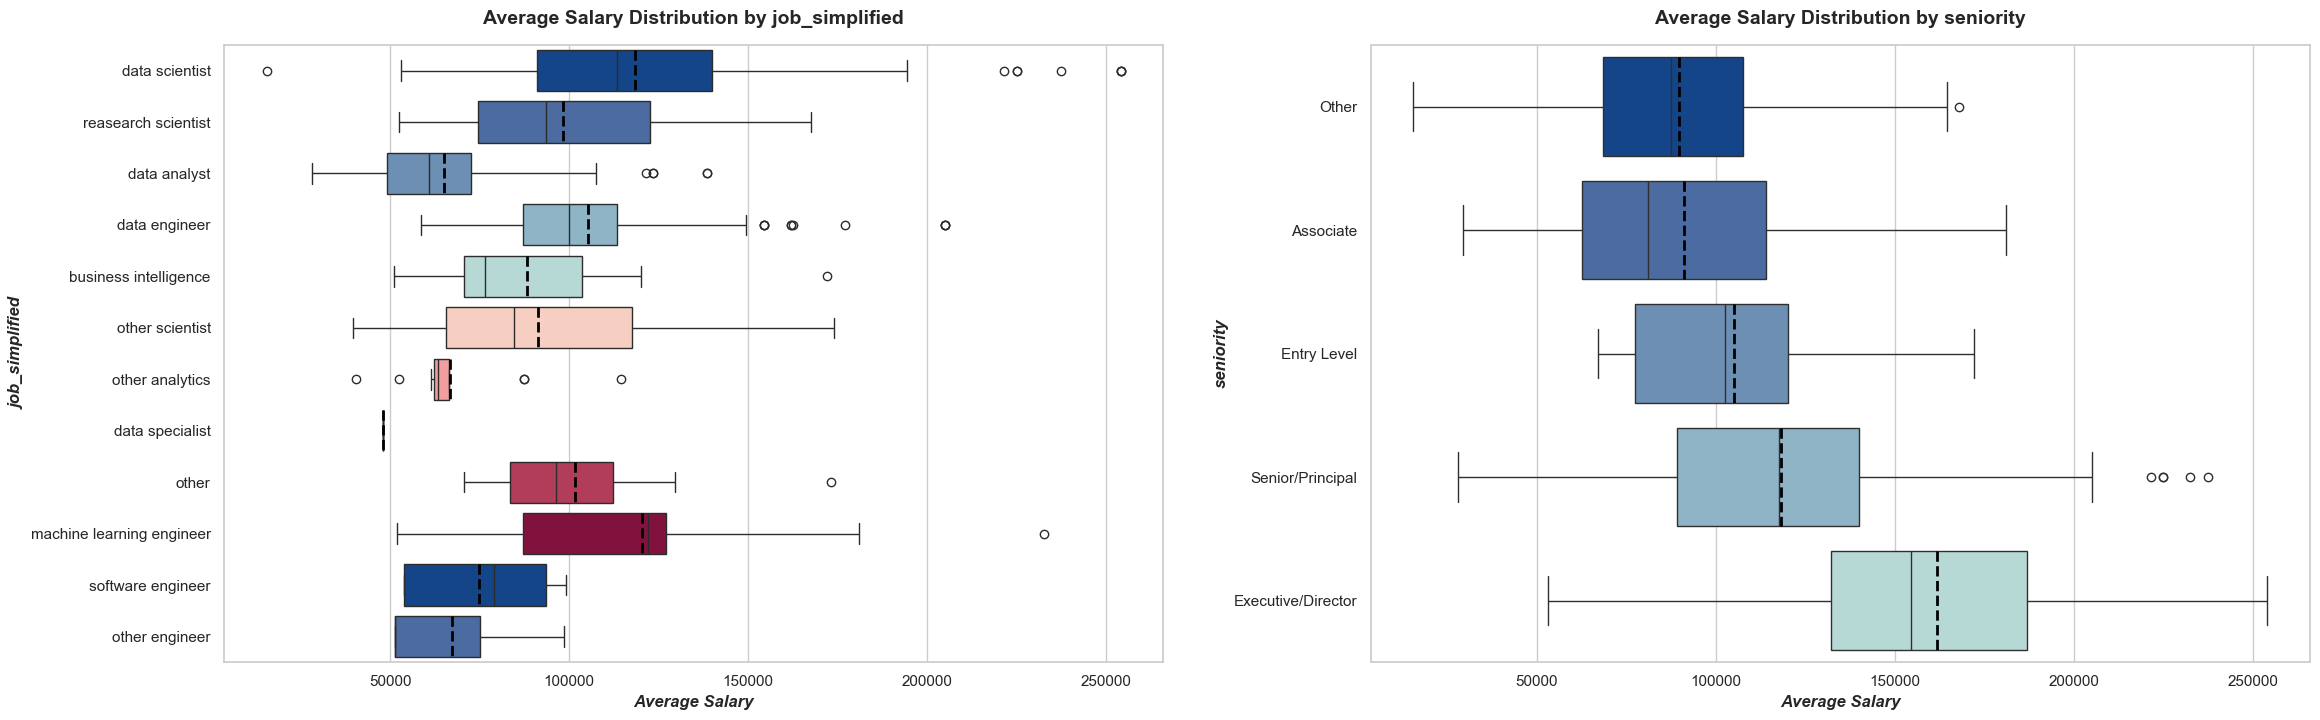

In [14]:
_, axes = plt.subplots(1, 2, figsize=(24, 8))

for col, ax in zip(['job_simplified', 'seniority'], axes):
    sns.boxplot(data=df, x='Average Salary', y=col, ax=ax, palette=cmap10,
                showmeans=True, meanline=True,
                meanprops={'color': 'black', 'linestyle': '--', 'linewidth': 2})

    mean_salary = df.groupby(col)['Average Salary'].mean().sort_values()

    ax.set_title(f'Average Salary Distribution by {col}', fontdict=font_tit, pad=15)
    ax.set_xlabel("Average Salary", fontdict=font_ax)
    ax.set_ylabel(col, fontdict=font_ax)

plt.tight_layout(pad=3)
plt.show()

## Salary Distribution Overview

This section presents salary distributions across different job titles and seniority levels.

---

### 1. **Salary by Job Title**
- Roles directly related to **Data Science** and **Artificial Intelligence** (e.g., *Data Scientist*, *Machine Learning Engineer*) have the **highest salaries**, reflecting their high demand and strategic value in the job market.
- Positions more focused on **data analysis** or **specialized reporting** (e.g., *Data Analyst*, *Business Intelligence*) tend to have **lower average salaries**.

---

### 2. **Salary by Seniority Level**
- **Highest:**  
  - *Executive/Director* positions show average salaries in the range of **$130,000–$185,000**, with some outliers exceeding **$250,000**.
  
- **Mid-Level:**  
  - *Senior/Principal* roles average between **$90,000–$140,000**, with occasional salaries exceeding **$200,000**.

- **Lower-Level:**  
  - *Other* positions generally fall between **$70,000–$110,000**, with **fewer outliers** and a **narrower salary range**.

---

### 3. **General Insights**
- **Higher job roles and seniority levels** are clearly associated with **higher salary distributions**.
- **Lower-tier positions** exhibit both **lower average salaries** and a **more compact distribution**, indicating fewer extreme values.

This analysis highlights the correlation between career progression and compensation, underlining the value of experience and specialization in the data industry.


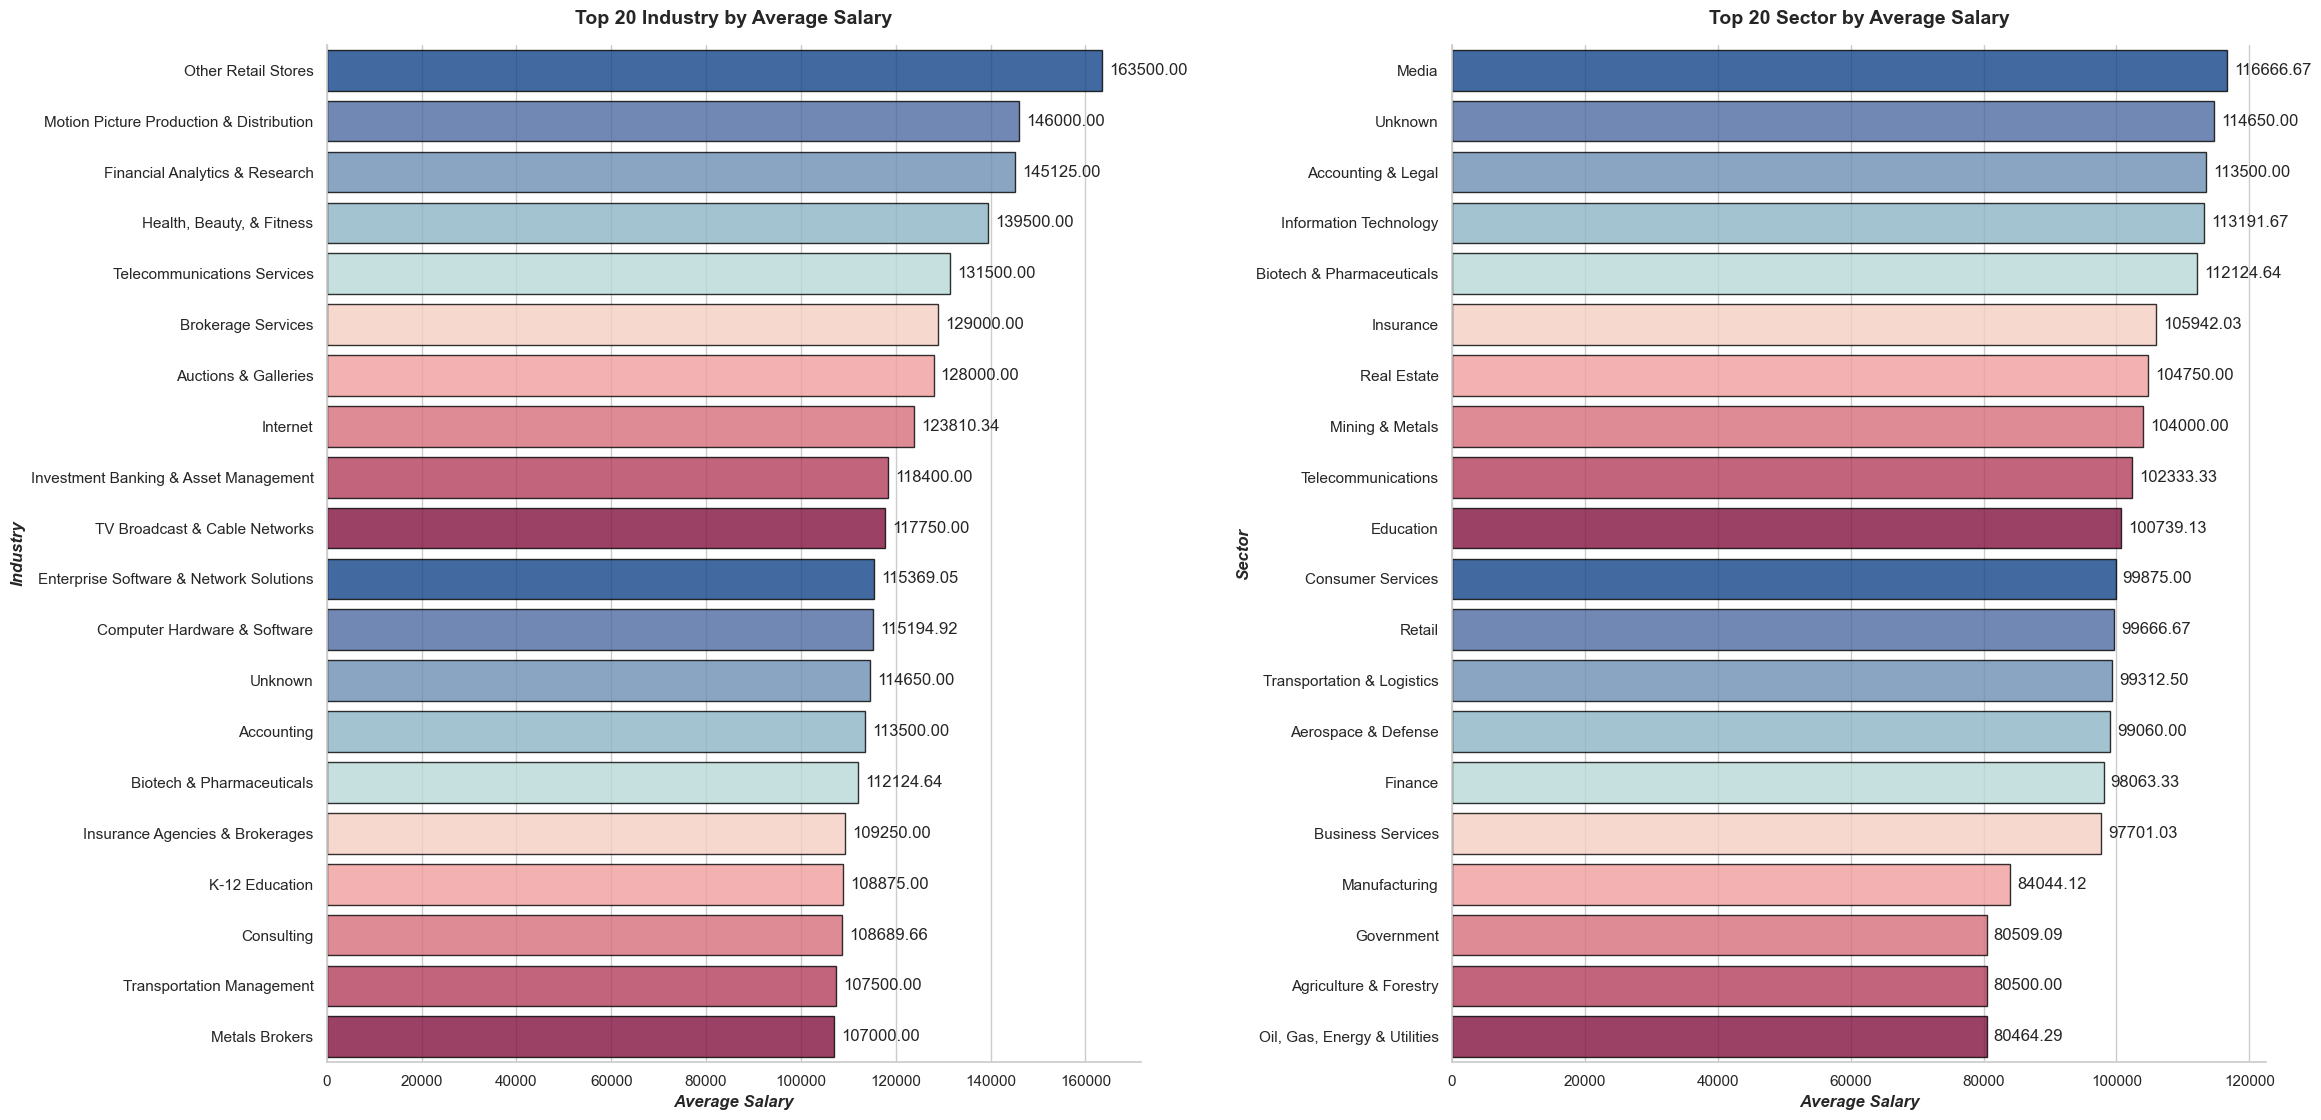

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(24, 12))

for col, ax in zip(['Industry', 'Sector'], axes):
    avg_salary_by_category = df.groupby(col)["Average Salary"].mean().sort_values(ascending=False)
    top_n                  = avg_salary_by_category.head(20)

    sns.barplot(x=top_n.values, y=top_n.index, palette=cmap10, ax=ax, alpha=0.8, edgecolor='black')

    ax.set_title(f'Top 20 {col} by Average Salary', fontdict=font_tit, pad=15)
    ax.set_xlabel("Average Salary", fontdict=font_ax)
    ax.set_ylabel(col, fontdict=font_ax)

    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge', padding=5)

sns.despine(top=True, right=True)
plt.tight_layout(pad=3)
plt.show()

## Top Industries and Sectors by Average Salary

This section analyzes the top 20 **industries** and **sectors** based on average salary.

---

### 1. **Top 20 Industries by Average Salary**

#### 🔍 Key Observations:
- **Highest-paying industries:**
  - **Other Retail Stores:** $163,500  
  - **Motion Picture Production & Distribution:** $146,000  
  - **Financial Analytics & Research:** $145,125  

- **Other high-paying industries:**
  - **Health, Beauty, & Fitness:** $139,500  
  - **Telecommunications Services:** $131,500  
  - **Brokerage Services:** $129,000  
  - **Auctions & Galleries:** $128,000  

- **Lower-paying industries (within Top 20):**
  - **Metals Brokers:** $107,000  
  - **Transportation Management:** $108,750  
  - **Consulting:** $106,869  

#### 💡 Insights:
- Industries related to **finance**, **technology**, and **entertainment** (e.g., *Motion Picture Production*, *Financial Analytics*, *Telecommunications*) tend to offer **higher average salaries**.
- Industries like **K–12 Education** and **Metals Brokers**, while in the top 20, still have **relatively lower salaries** compared to the top tiers.

---

### 2. **Top 20 Sectors by Average Salary**

#### 🔍 Key Observations:
- **Highest-paying sectors:**
  - **Media:** $116,666  
  - **Unknown:** $114,650  
  - **Accounting & Legal:** $113,500  

- **Other high-paying sectors:**
  - **Information Technology:** $113,191  
  - **Biotech & Pharmaceuticals:** $112,124  
  - **Insurance:** $105,942  
  - **Real Estate:** $104,750  

- **Lower-paying sectors (within Top 20):**
  - **Government:** $80,509  
  - **Agriculture & Forestry:** $80,500  
  - **Oil, Gas, Energy & Utilities:** $80,464  

#### 💡 Insights:
- Sectors like **Media**, **Information Technology**, and **Biotech & Pharmaceuticals** top the list in terms of average salary.
- Sectors such as **Government**, **Agriculture**, and **Utilities** have lower average salaries, but still rank within the top 20.

---

### 3. **Summary**
- **Top-paying industry:** *Other Retail Stores* – $163,500  
- **Top-paying sector:** *Media* – $116,666  
- **General Trend:** Industries and sectors tied to **finance**, **technology**, and **entertainment** offer the highest salaries. Meanwhile, those related to **education**, **government**, and **agriculture** have **lower compensation levels**, even within the top 20.


### **b. Company group** (Company Name, Size, Age, Type of ownership, Rating, Rating Category, Revenue)

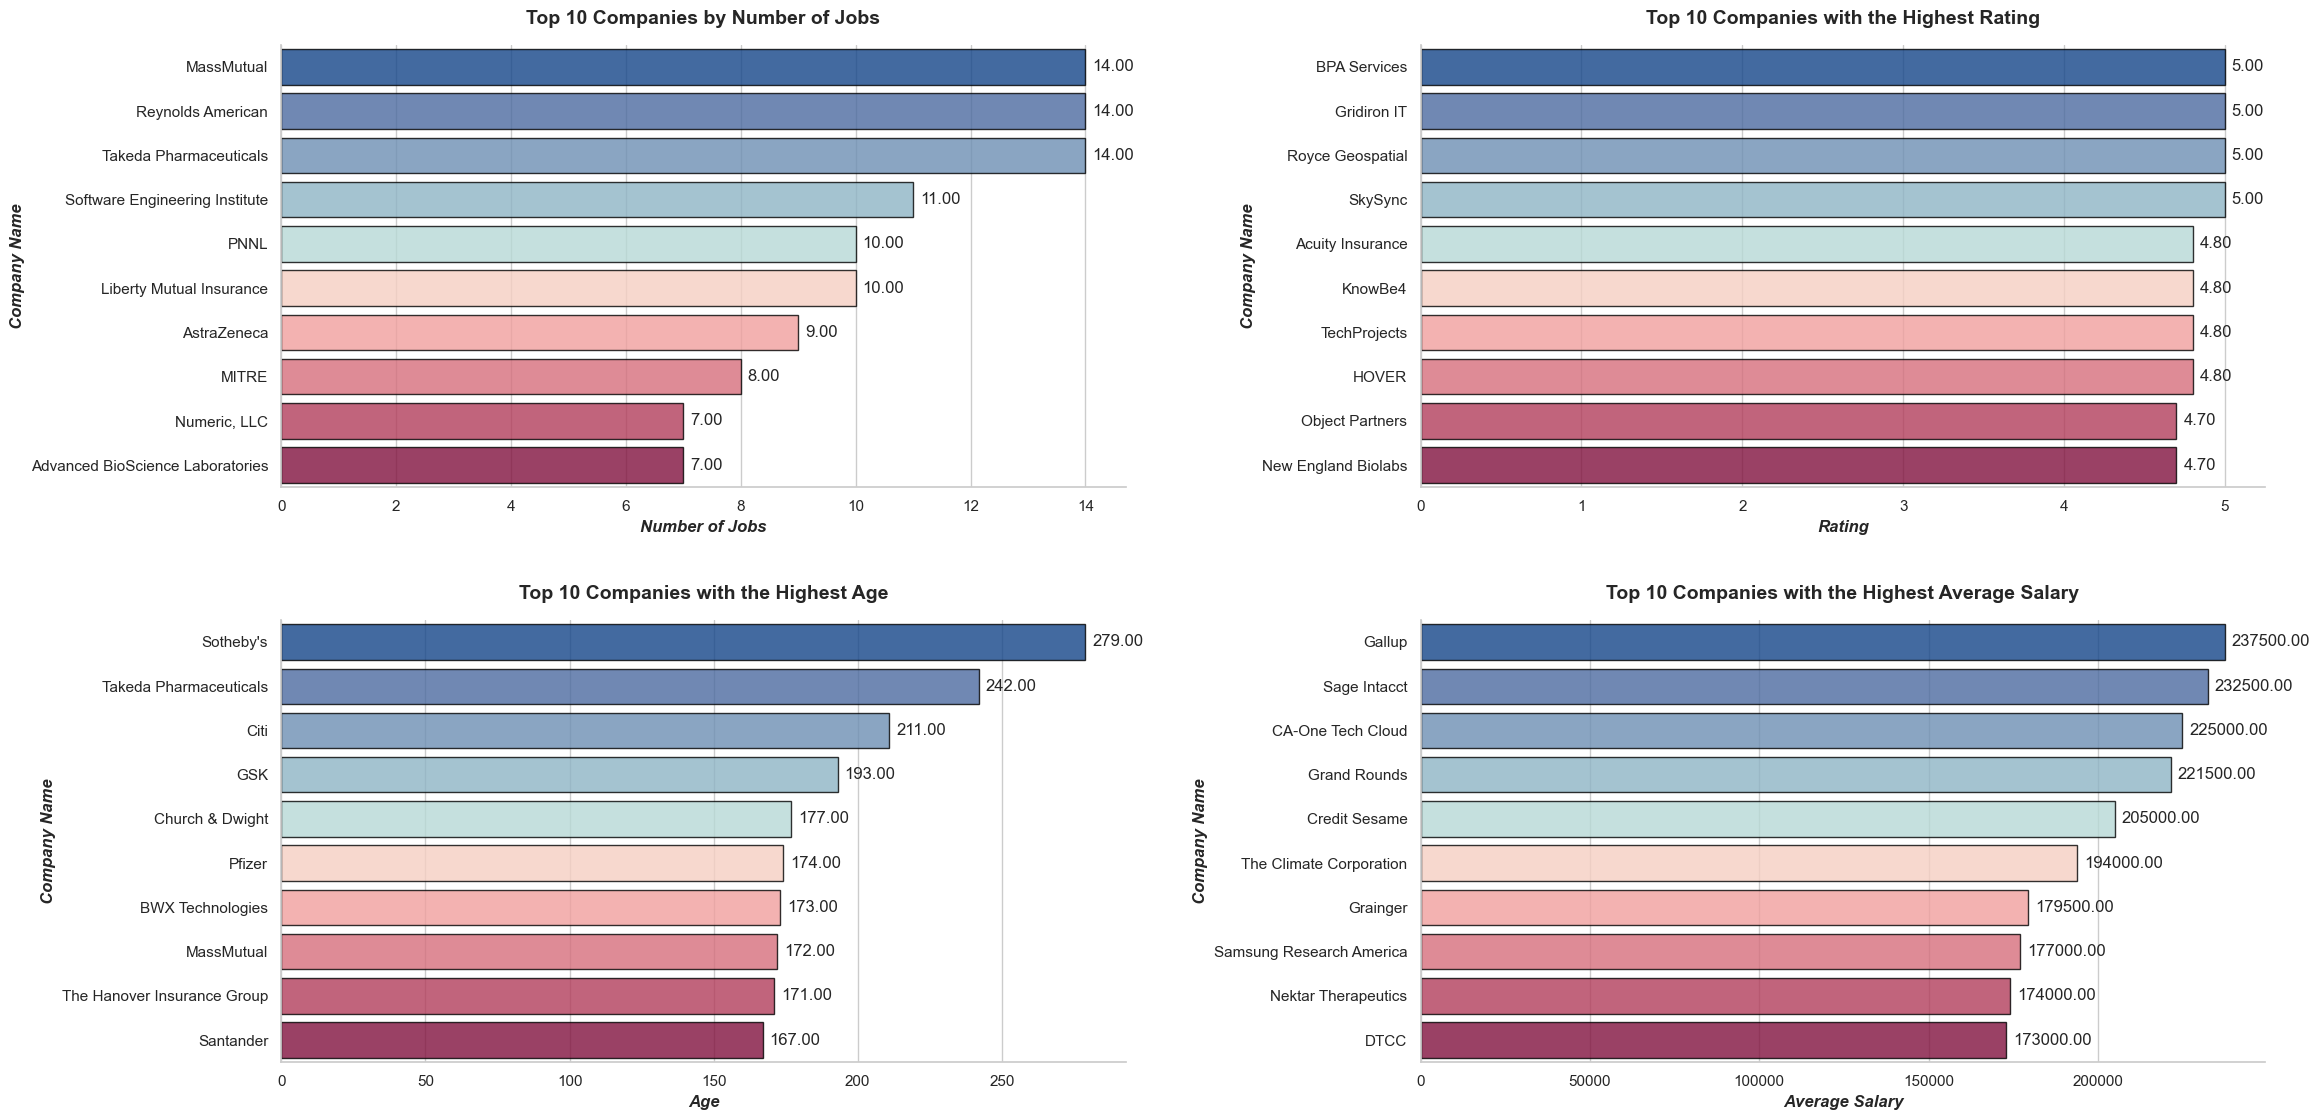

In [16]:
_, axes = plt.subplots(2, 2, figsize=(24, 12))

for col, ax in zip(['Company Name', 'Rating', 'Age', 'Average Salary'], axes.ravel()):
    if col == 'Company Name':
        top_companies = df['Company Name'].value_counts().head(10)
        sns.barplot(x=top_companies.values, y=top_companies.index, palette=cmap10, ax=ax, alpha=0.8, edgecolor='black')

        ax.set_title("Top 10 Companies by Number of Jobs", fontdict=font_tit, pad=15)
        ax.set_xlabel("Number of Jobs", fontdict=font_ax)
        ax.set_ylabel("Company Name", fontdict=font_ax)
    else:
        top_by_category = df[['Company Name', col]].groupby('Company Name').mean().sort_values(col, ascending=False)
        top_n           = top_by_category.head(10)

        sns.barplot(x=top_n[col], y=top_n.index, palette=cmap10, ax=ax, alpha=0.8, edgecolor='black')

        ax.set_title(f"Top 10 Companies with the Highest {col}", fontdict=font_tit, pad=15)
        ax.set_xlabel(col, fontdict=font_ax)
        ax.set_ylabel("Company Name", fontdict=font_ax)

    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge', padding=5)

sns.despine(top=True, right=True)
plt.tight_layout(pad=3)
plt.show()

## Top Companies Overview

This section highlights the top 10 companies based on four key criteria: number of job listings, rating, company age, and average salary.

---

### 1. **Top 10 Companies by Number of Jobs**

#### 🔍 Key Observations:
- **Most job listings:**
  - **MassMutual**, **Reynolds American**, and **Takeda Pharmaceuticals** – 14 jobs each.

- **Next in line:**
  - **Software Engineering Institute** – 11 jobs  
  - **PNNL**, **Liberty Mutual Insurance** – 10 jobs  
  - **AstraZeneca** – 9 jobs  

- **Lower within the Top 10:**
  - **MITRE**, **Numeric, LLC**, and **Advanced BioScience Laboratories** – 7–8 jobs

#### 💡 Insights:
- Major players in **insurance**, **pharmaceuticals**, and **technology** typically post more job openings.
- **MassMutual** and **Takeda Pharmaceuticals** stand out with the highest number of positions.

---

### 2. **Top 10 Companies by Highest Rating**

#### 🔍 Key Observations:
- **Highest-rated companies (5.0):**
  - **BPA Services**, **Gridiron IT**, **Royce Geospatial**, **SkySync**

- **Next in line:**
  - **Acuity Insurance**, **KnowBe4**, **TechProjects**, **HOVER** – 4.8  
  - **Object Partners**, **New England Biolabs** – 4.7

#### 💡 Insights:
- Highly-rated companies are mostly in **technology**, **insurance**, or **data-related** sectors.
- Companies like **BPA Services** and **Gridiron IT** earned a perfect score of 5.0.

---

### 3. **Top 10 Companies by Age (Oldest Companies)**

#### 🔍 Key Observations:
- **Oldest company:**
  - **Sotheby’s** – 279 years old

- **Others with long history:**
  - **Takeda Pharmaceuticals** – 242 years  
  - **Citi** – 211 years  
  - **GSK** – 193 years  
  - **Church & Dwight** – 177 years  

- **Others in the Top 10:**
  - **MassMutual**, **BWX Technologies**, **The Hanover Insurance Group**, **Santander** – 167–174 years

#### 💡 Insights:
- Companies in **finance**, **insurance**, and **pharmaceuticals** often have long-standing history.
- **Sotheby’s**, an auction house, is the oldest among them with nearly three centuries of history.

---

### 4. **Top 10 Companies by Highest Average Salary**

#### 🔍 Key Observations:
- **Highest average salary:**
  - **Gallup** – $237,500  
  - **Sage Intacct** – $232,500  
  - **CA-One Tech Cloud** – $225,000  

- **Next highest:**
  - **Grand Rounds** – $221,500  
  - **Credit Sesame** – $205,000  
  - **The Climate Corporation** – $194,000  

- **Lower in the Top 10:**
  - **Grainger**, **Samsung Research America**, **Nektar Therapeutics**, **DTCC** – $173,000–$179,500

#### 💡 Insights:
- Leading companies in **technology** and **research** dominate in compensation.
- Salaries at top firms can exceed **$230,000**, highlighting the premium placed on high-value roles.

---

### 5. **Summary**

- **Most job listings:** Companies in insurance and pharmaceuticals – **MassMutual**, **Takeda Pharmaceuticals**
- **Highest ratings:** Technology and insurance companies like **BPA Services**, **Gridiron IT** (rating: 5.0)
- **Oldest company:** **Sotheby’s** – 279 years old
- **Top salaries:** Tech-driven companies such as **Gallup** and **Sage Intacct**, with average salaries over **$230,000**


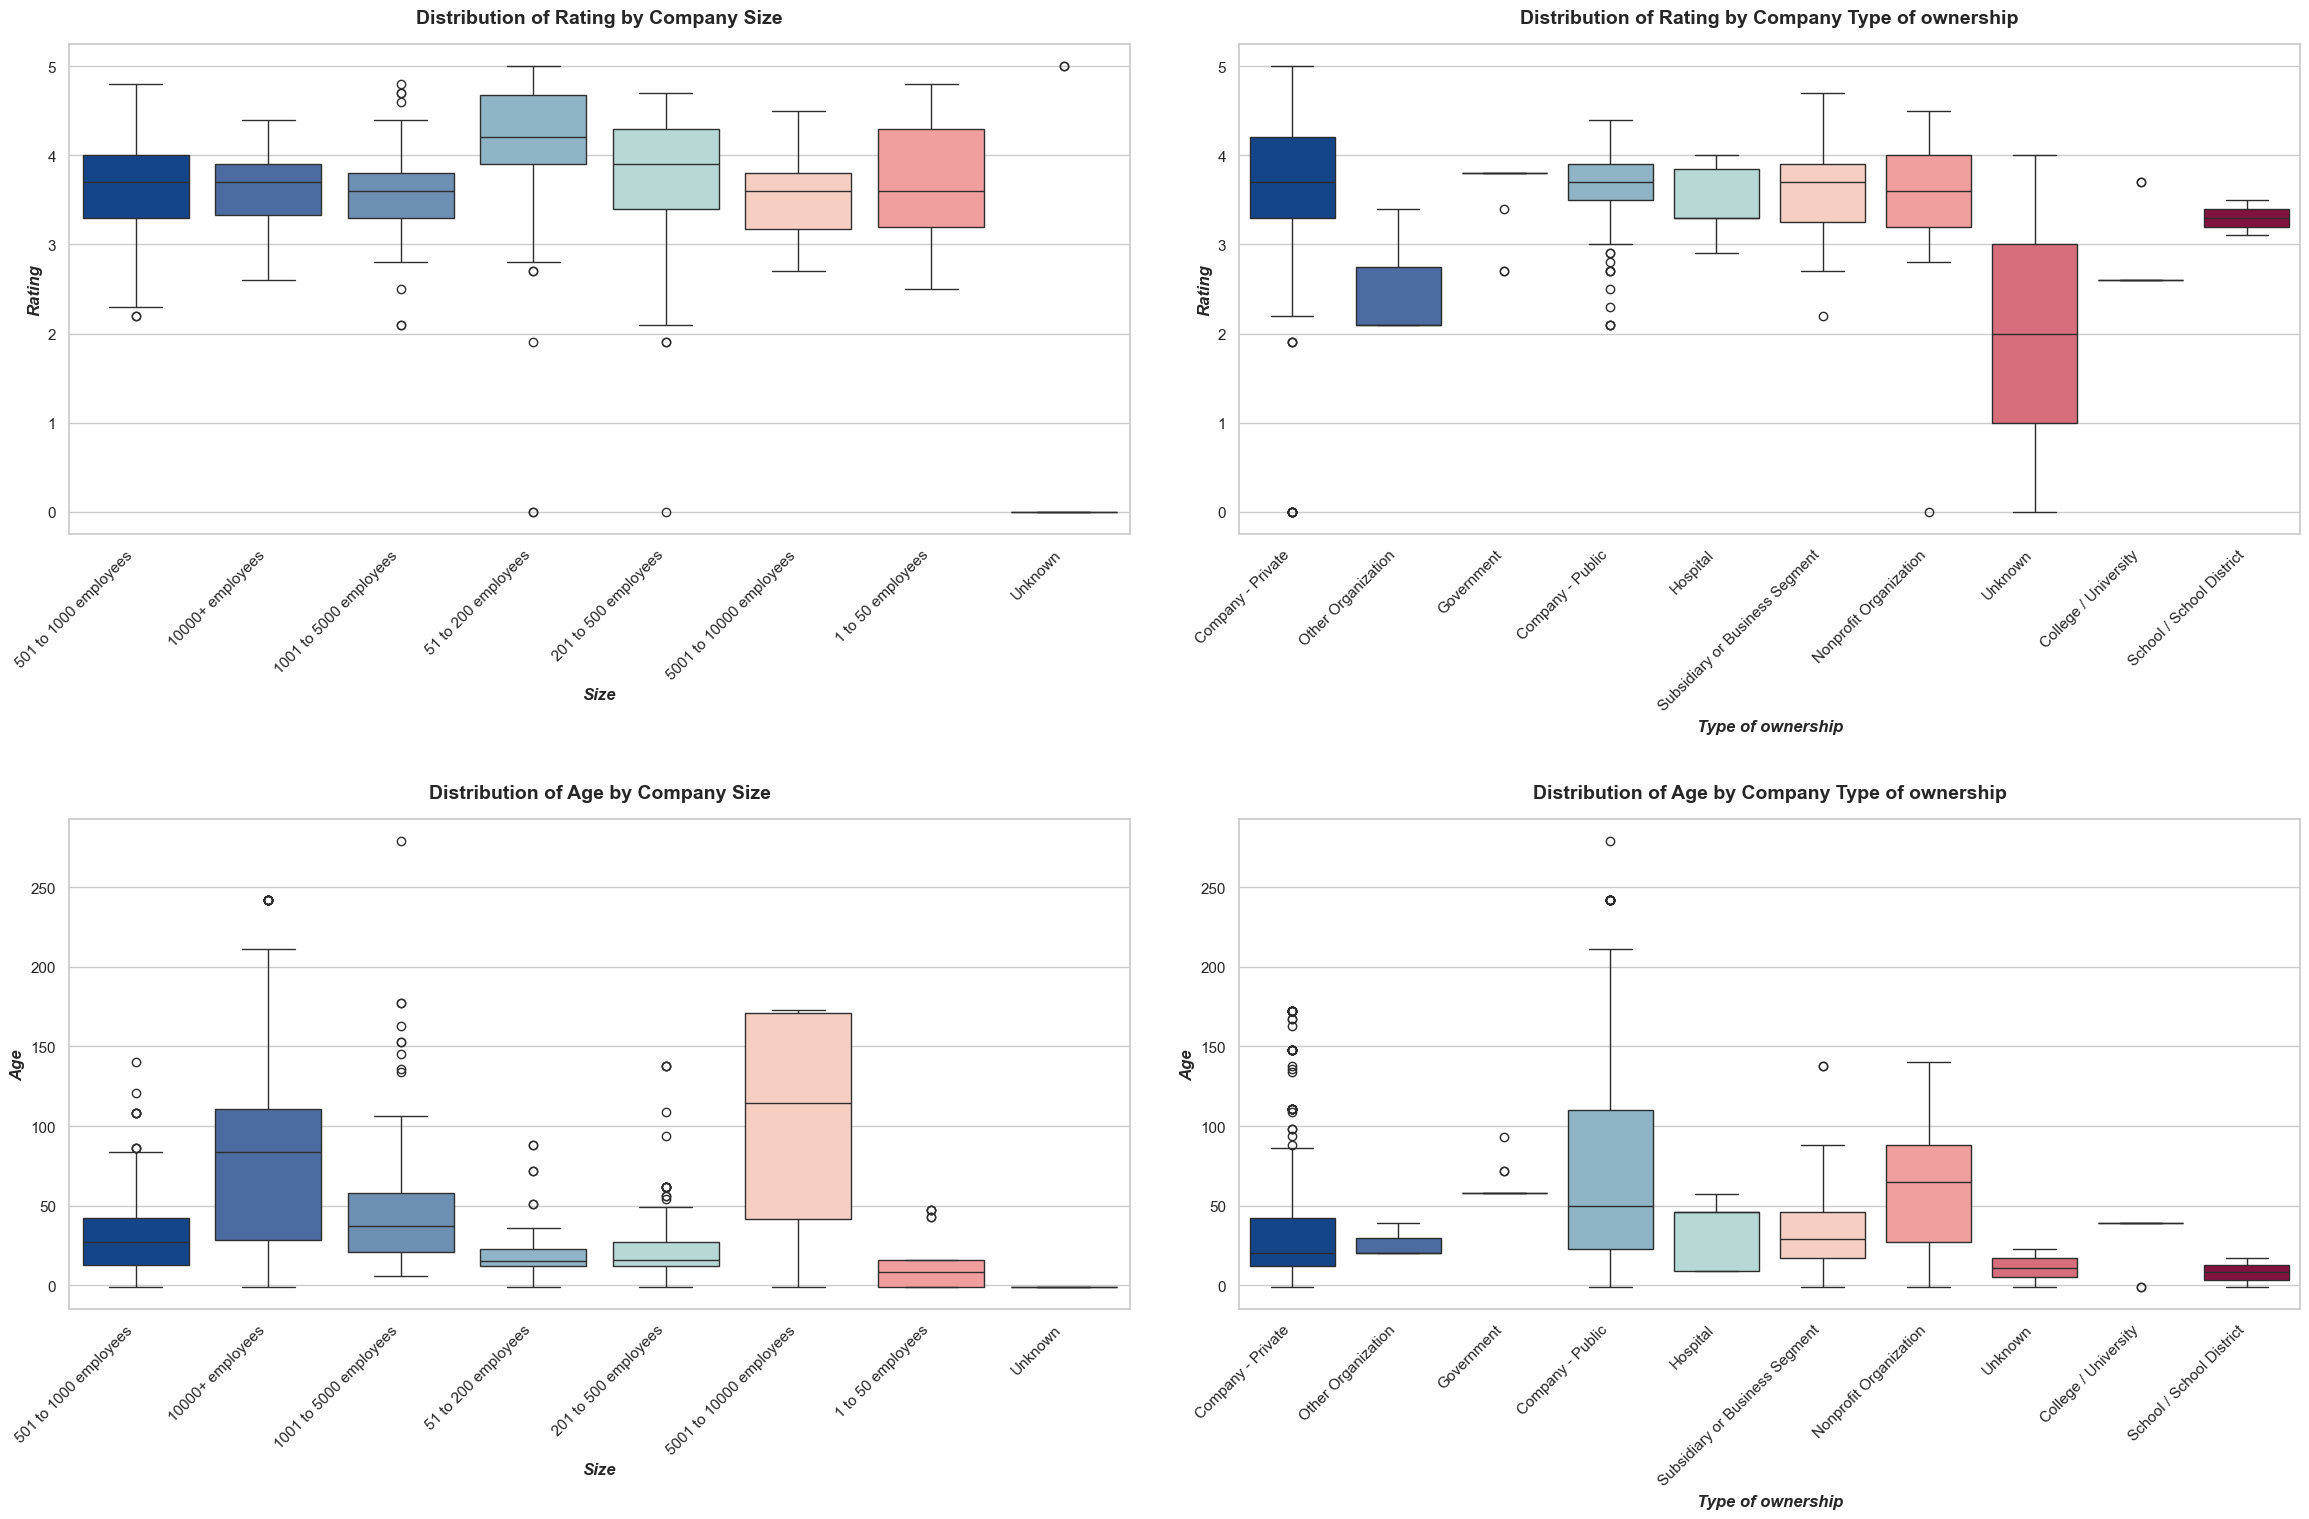

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(24, 16))

ycols = ['Rating', 'Age']
xcols = ['Size', 'Type of ownership']

for i, (ycol, ax_row) in enumerate(zip(ycols, axes)):
    for j, (xcol, ax) in enumerate(zip(xcols, ax_row)):
        sns.boxplot(data=df, x=xcol, y=ycol, ax=ax, palette=cmap10)

        ax.set_title(f'Distribution of {ycol} by Company {xcol}', fontdict=font_tit, pad=15)
        ax.set_xlabel(xcol, fontdict=font_ax)
        ax.set_ylabel(ycol, fontdict=font_ax)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout(pad=3)
plt.show()

## Company Rating & Age Distributions Analysis

This section analyzes how company **Rating** and **Age** distribute across different **Company Sizes** and **Ownership Types** based on four subplots.

---

### 1. **Rating Distribution by Company Size (Top-Left)**

#### 🔍 Key Observations:
- **Large companies (1000+ employees)** show a **stable and high rating distribution**, with a median close to 4.0.
- **Small companies (1–50 employees)** have **wider rating variability** and a **lower median**.
- Companies with **51–500 employees** show the **highest concentration of high ratings**, with a median close to **4.5**.
- **Unknown size** companies tend to have **extremely low ratings**, nearly **0** in some cases.

#### 💡 Conclusion:
- Larger companies generally receive **more stable and higher ratings**.
- Smaller or unknown-sized companies show **greater volatility** in ratings.

---

### 2. **Rating Distribution by Ownership Type (Top-Right)**

#### 🔍 Key Observations:
- **Private companies** have the **highest and most stable ratings**, with a median around **4.0**.
- **Other Organizations** and **Government entities** show **lower median ratings** (below 3), with many **low outliers**.
- **Public companies**, **Hospitals**, and **Subsidiaries** maintain a fairly **high and stable median** (~4).
- **Unknown**, **Colleges/Universities** have **very low average ratings**, with frequent minimum values near **0**.

#### 💡 Conclusion:
- **Private firms** and **structured business entities** tend to receive **better ratings**.
- **Government** and **unspecified organizations** generally receive **lower satisfaction scores**.

---

### 3. **Age Distribution by Company Size (Bottom-Left)**

#### 🔍 Key Observations:
- **Small companies (1–50 employees)** tend to be the **oldest**, with a wide age distribution and median around **100 years**.
- Companies with **5001–10000 employees** are among the **youngest**.
- Companies with **1000+** and **501–1000 employees** have **moderate, stable ages**, median around **25–50 years**.
- **Unknown size** companies are typically **very young** (close to 0 years old).

#### 💡 Conclusion:
- **Small firms** can be **surprisingly old**, possibly long-established with limited growth.
- **Larger firms** tend to be **younger**, perhaps due to recent expansions or mergers.

---

### 4. **Age Distribution by Ownership Type (Bottom-Right)**

#### 🔍 Key Observations:
- **Public companies** and **Hospitals** are generally **older**, with medians **over 50 years**.
- **Government** and **Other Organizations** include **some of the oldest entities**, with outliers above **200 years**.
- **Private companies** and **Subsidiaries** are relatively **younger**, medians **under 25 years**.
- **Unknown**, **College/University**, and **School District** types show **low average ages**.

#### 💡 Conclusion:
- **Public and governmental entities** tend to be **older and more established**.
- **Private businesses** and **startups** are typically **younger and newer**.

---

### 5. **Summary**

- **Rating Insights:**
  - **Large companies** and **private firms** receive **higher and more stable ratings**.
  - **Small or unclassified organizations** show **lower and more volatile satisfaction**.

- **Age Insights:**
  - **Small firms** and **government-related entities** can be **very old**.
  - **Private** and **subsidiary companies** tend to be **newer entrants** in the market.

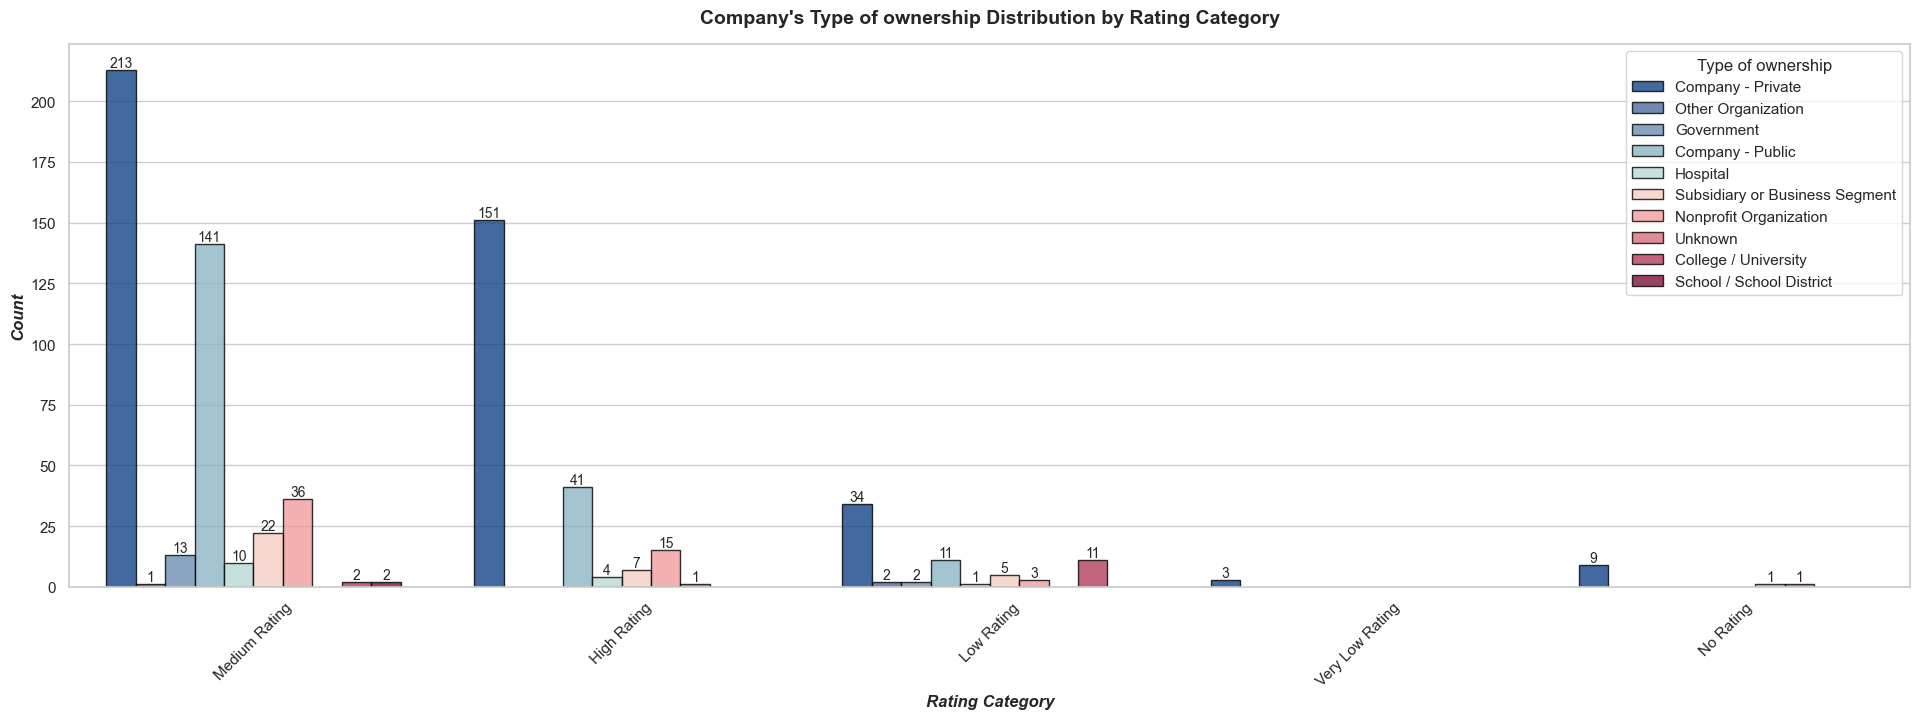

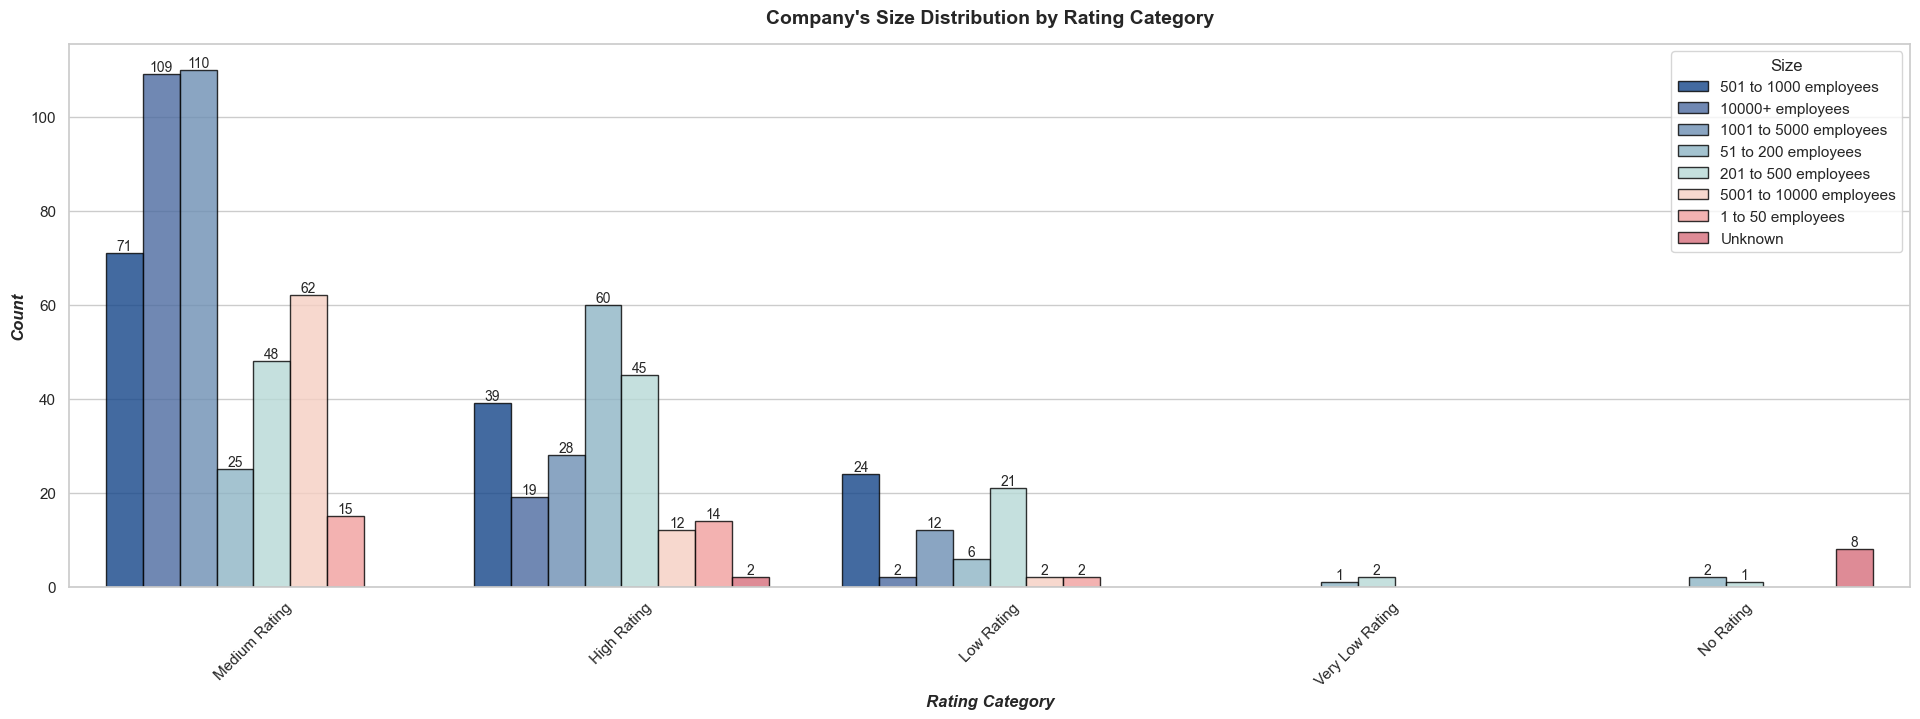

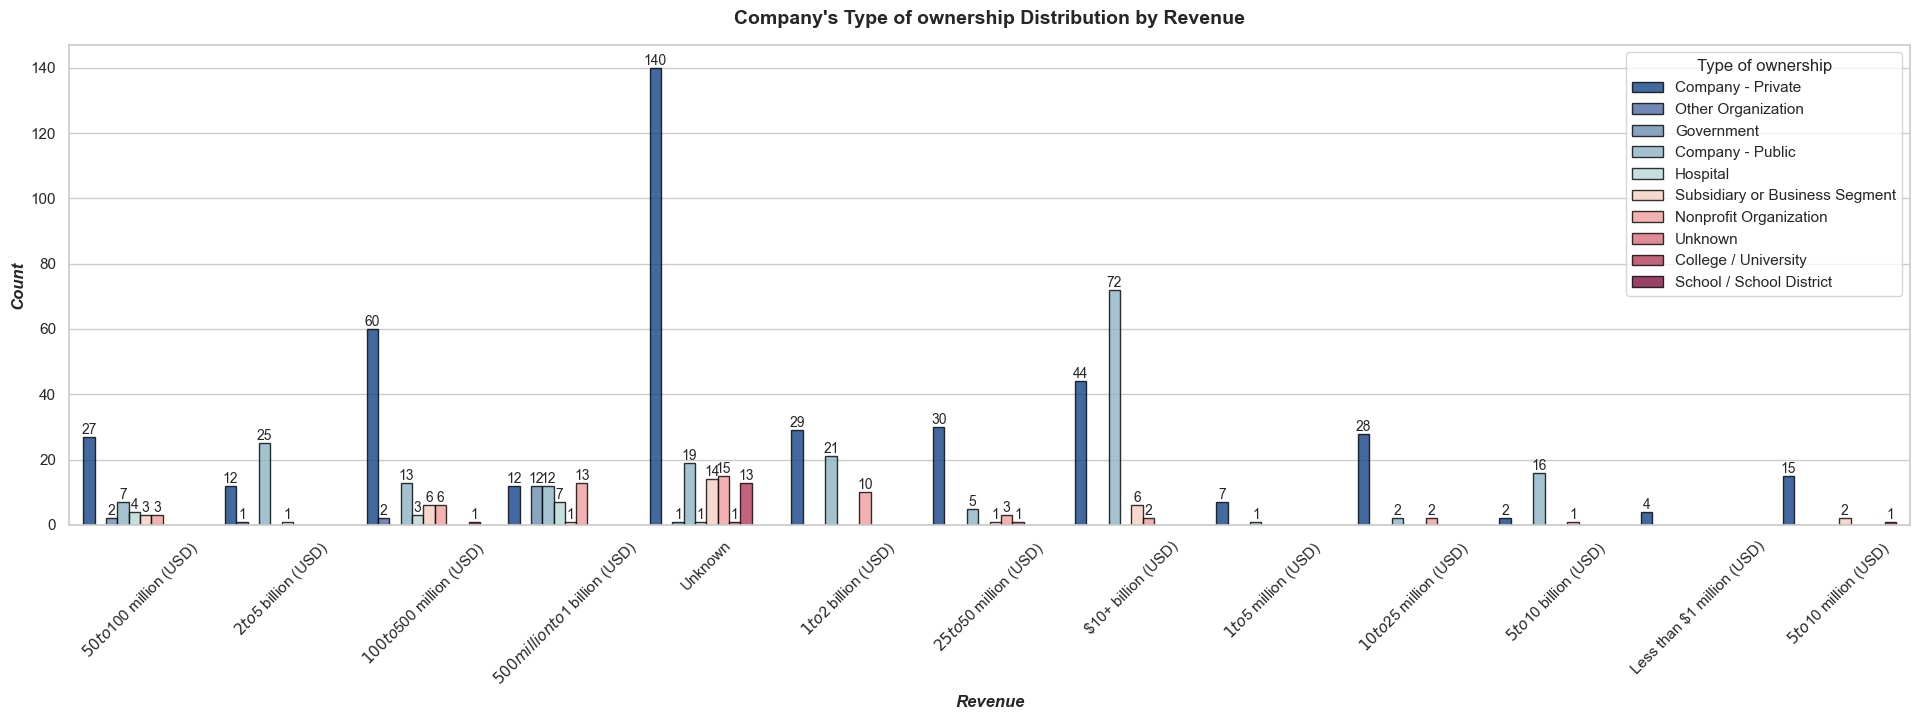

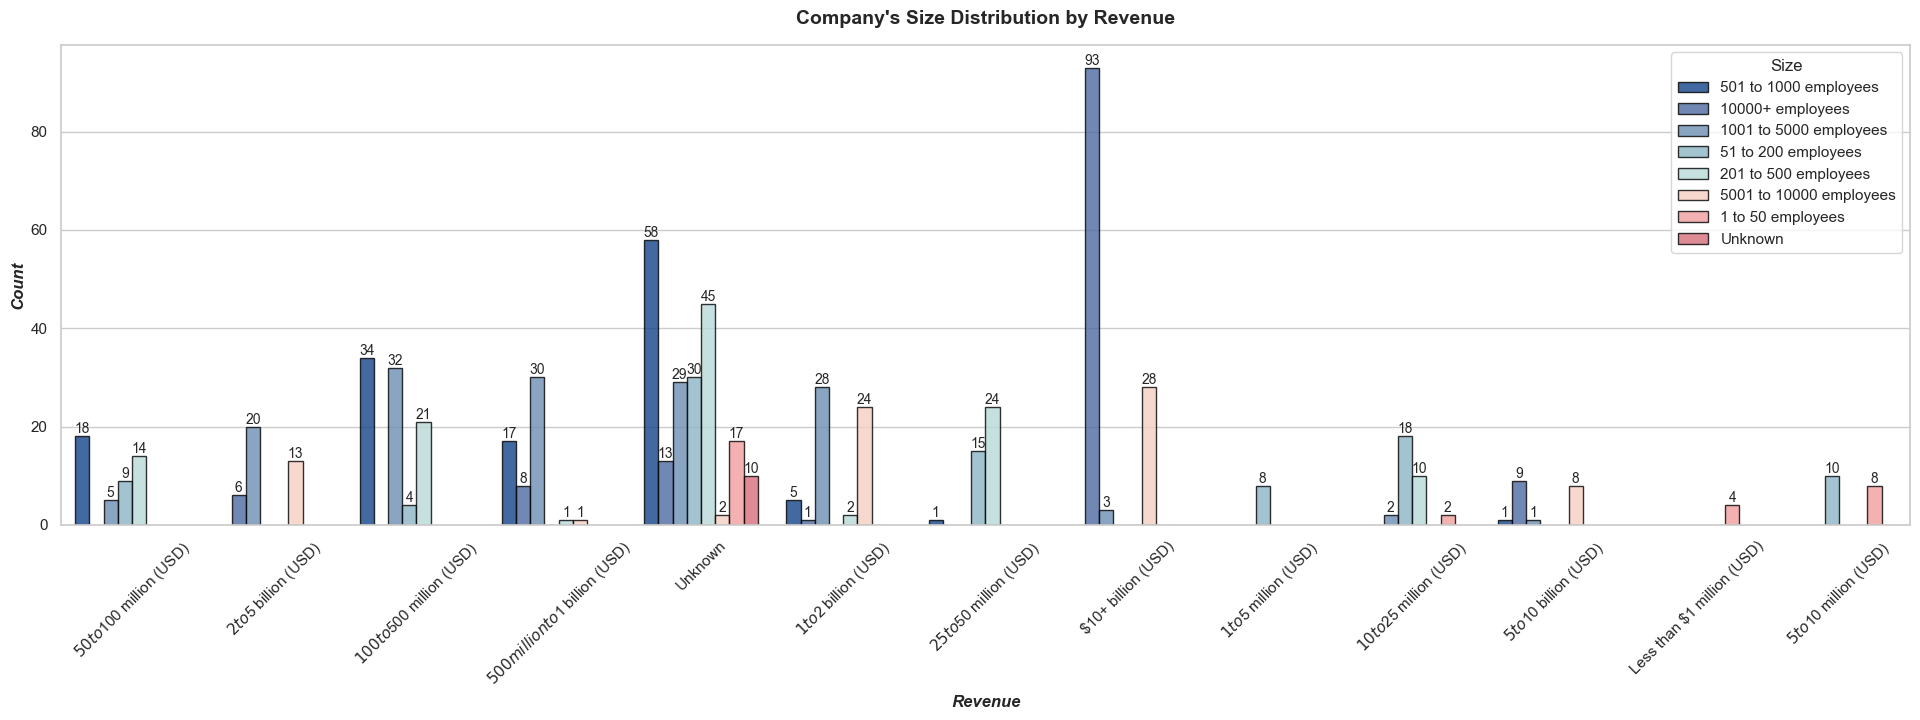

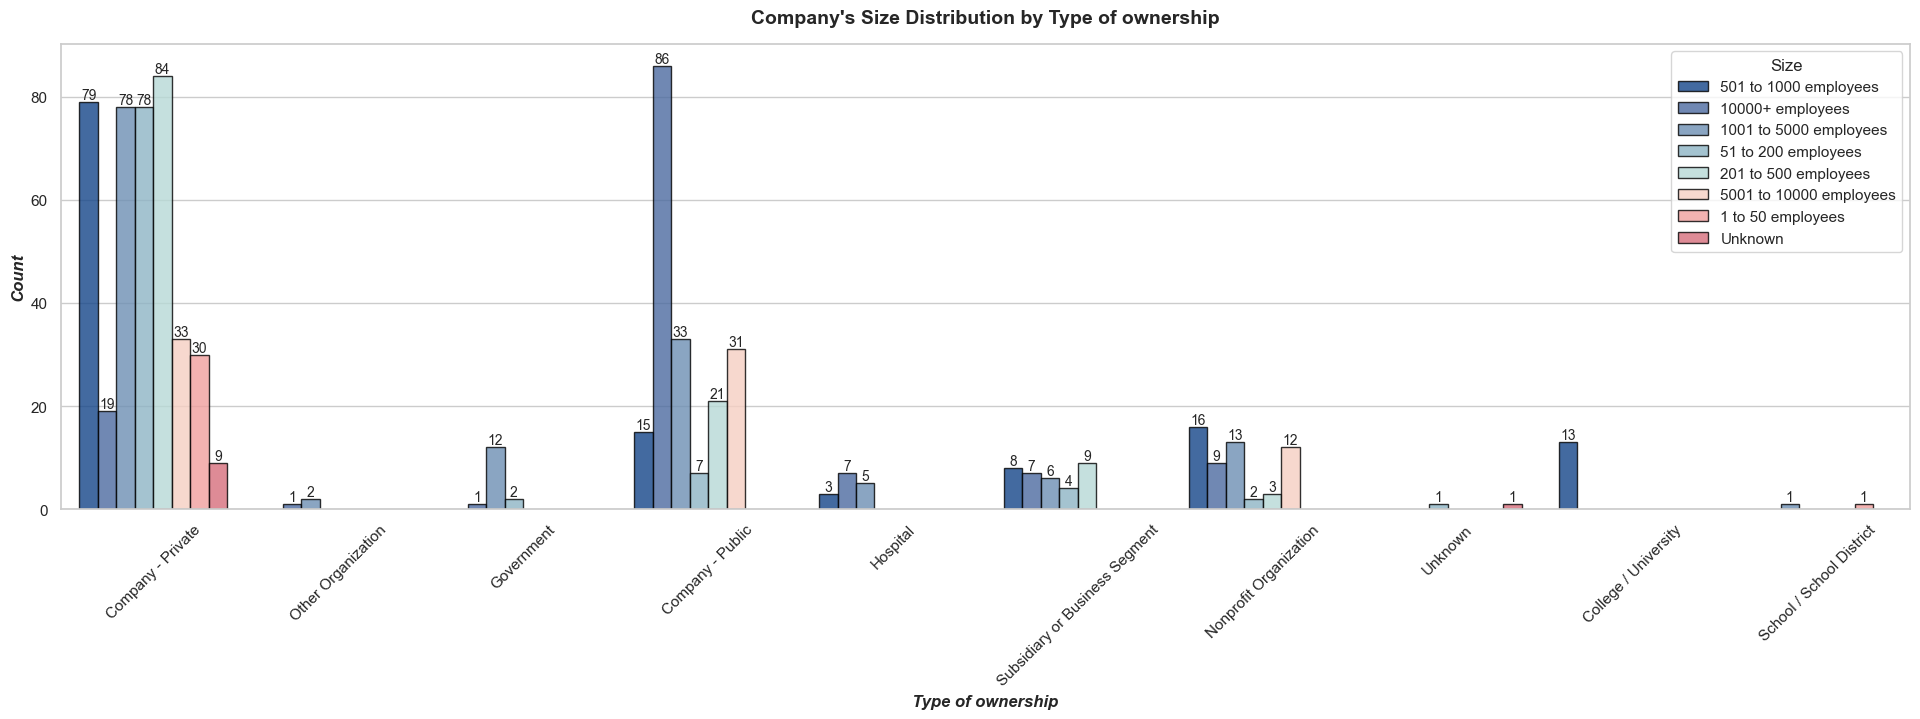

In [18]:
pairs = list(itertools.product(
    ['Rating Category', 'Revenue', 'Type of ownership'],
    ['Type of ownership', 'Size']
))

for pair in pairs:
    if pair[0] != pair[1]:
        plt.figure(figsize=(20, 8))
        sns.countplot(x=pair[0], hue=pair[1], data=df, palette=cmap10, alpha=0.8, edgecolor='black')

        plt.title(f"Company's {pair[1]} Distribution by {pair[0]}", fontdict=font_tit, pad=15)
        plt.xlabel(pair[0], fontdict=font_ax)
        plt.ylabel("Count", fontdict=font_ax)
        plt.xticks(rotation=45)

        for container in plt.gca().containers:
            plt.gca().bar_label(container, fmt='%d', label_type='edge', fontsize=10)

        plt.tight_layout(pad=3)
        plt.show()

## Cross-Distribution Analysis: Company Size, Ownership Type, Revenue, and Rating

This section analyzes how different company characteristics (ownership type, size, and revenue) relate to their **rating categories** and **revenue tiers**.

---

### 1. **Ownership Type Distribution by Rating Category**

#### 🔍 Key Observations:
- **Private companies** dominate both **Medium Rating** (213 companies) and **High Rating** (151 companies) groups.
- **Public companies** are second in representation, particularly in **Medium Rating** (141 companies) and **High Rating** (41 companies).
- **Non-profits** and **universities** are mostly clustered within the **Medium Rating** group and rarely appear in the high rating category.

#### 💡 Conclusion:
- **Private and public companies** are strongly represented among higher-rated organizations.
- **Smaller ownership types** (e.g., non-profits, schools) tend to cluster around the **medium rating** group.

---

### 2. **Company Size Distribution by Rating Category**

#### 🔍 Key Observations:
- **Very large companies (10,000+ employees)** and **large companies (501–1000 employees)** are dominant in **Medium** and **High Rating** groups, with over **110 companies** in Medium Rating alone.
- **Small companies (1–50 employees)** are less represented and mainly appear in Medium and High Rating categories.

#### 💡 Conclusion:
- **Larger company size** is positively correlated with **higher ratings**.
- **Small firms** are less frequently rated highly.

---

### 3. **Ownership Type Distribution by Revenue Group**

#### 🔍 Key Observations:
- **Private companies** are the most common across **all revenue groups**.
- **Public companies** are more concentrated in the **higher revenue tiers**, and less common in lower revenue categories.
- **Non-profits** and **universities** mainly appear in **low to medium revenue** groups.

#### 💡 Conclusion:
- **Private firms** have broad representation regardless of revenue.
- **Public companies** tend to dominate at the **top end of the revenue spectrum**.

---

### 4. **Company Size Distribution by Revenue Group**

#### 🔍 Key Observations:
- **Very large companies (10,000+ employees)** are concentrated in the **high revenue groups**.
- **Large companies (1001–5000 employees)** are spread fairly evenly across **medium to high revenue** tiers.
- **Small companies (1–200 employees)** cluster in **lower revenue** groups and are rarely seen among high earners.

#### 💡 Conclusion:
- **Larger company sizes are strongly associated with higher revenues**.
- **Smaller firms** are primarily found in **lower revenue brackets**.

---

### 5. **Company Size Distribution by Ownership Type**

#### 🔍 Key Observations:
- **Private companies** are prevalent across **all company sizes**.
- **Public companies** also show strong representation, especially in the **very large size** group (**88 companies** in 10,000+ employees).
- **Non-profits** and **universities** are mainly found in **medium-sized companies**.

#### 💡 Conclusion:
- **Private and public firms** dominate at larger company sizes.
- **Non-profits and educational institutions** are typically **medium-sized**.

---

### 6. **Overall Summary**

- **Private and public companies** are **dominant** across **high rating and high revenue categories**, particularly among **very large organizations**.
- **Non-profits and universities** tend to cluster around **medium ratings**, **moderate revenue**, and **medium sizes**.
- **High revenue and ratings** are typically tied to **larger company size**.
- **Smaller or undefined organizations** are less likely to receive **high ratings** or generate **high revenue**.


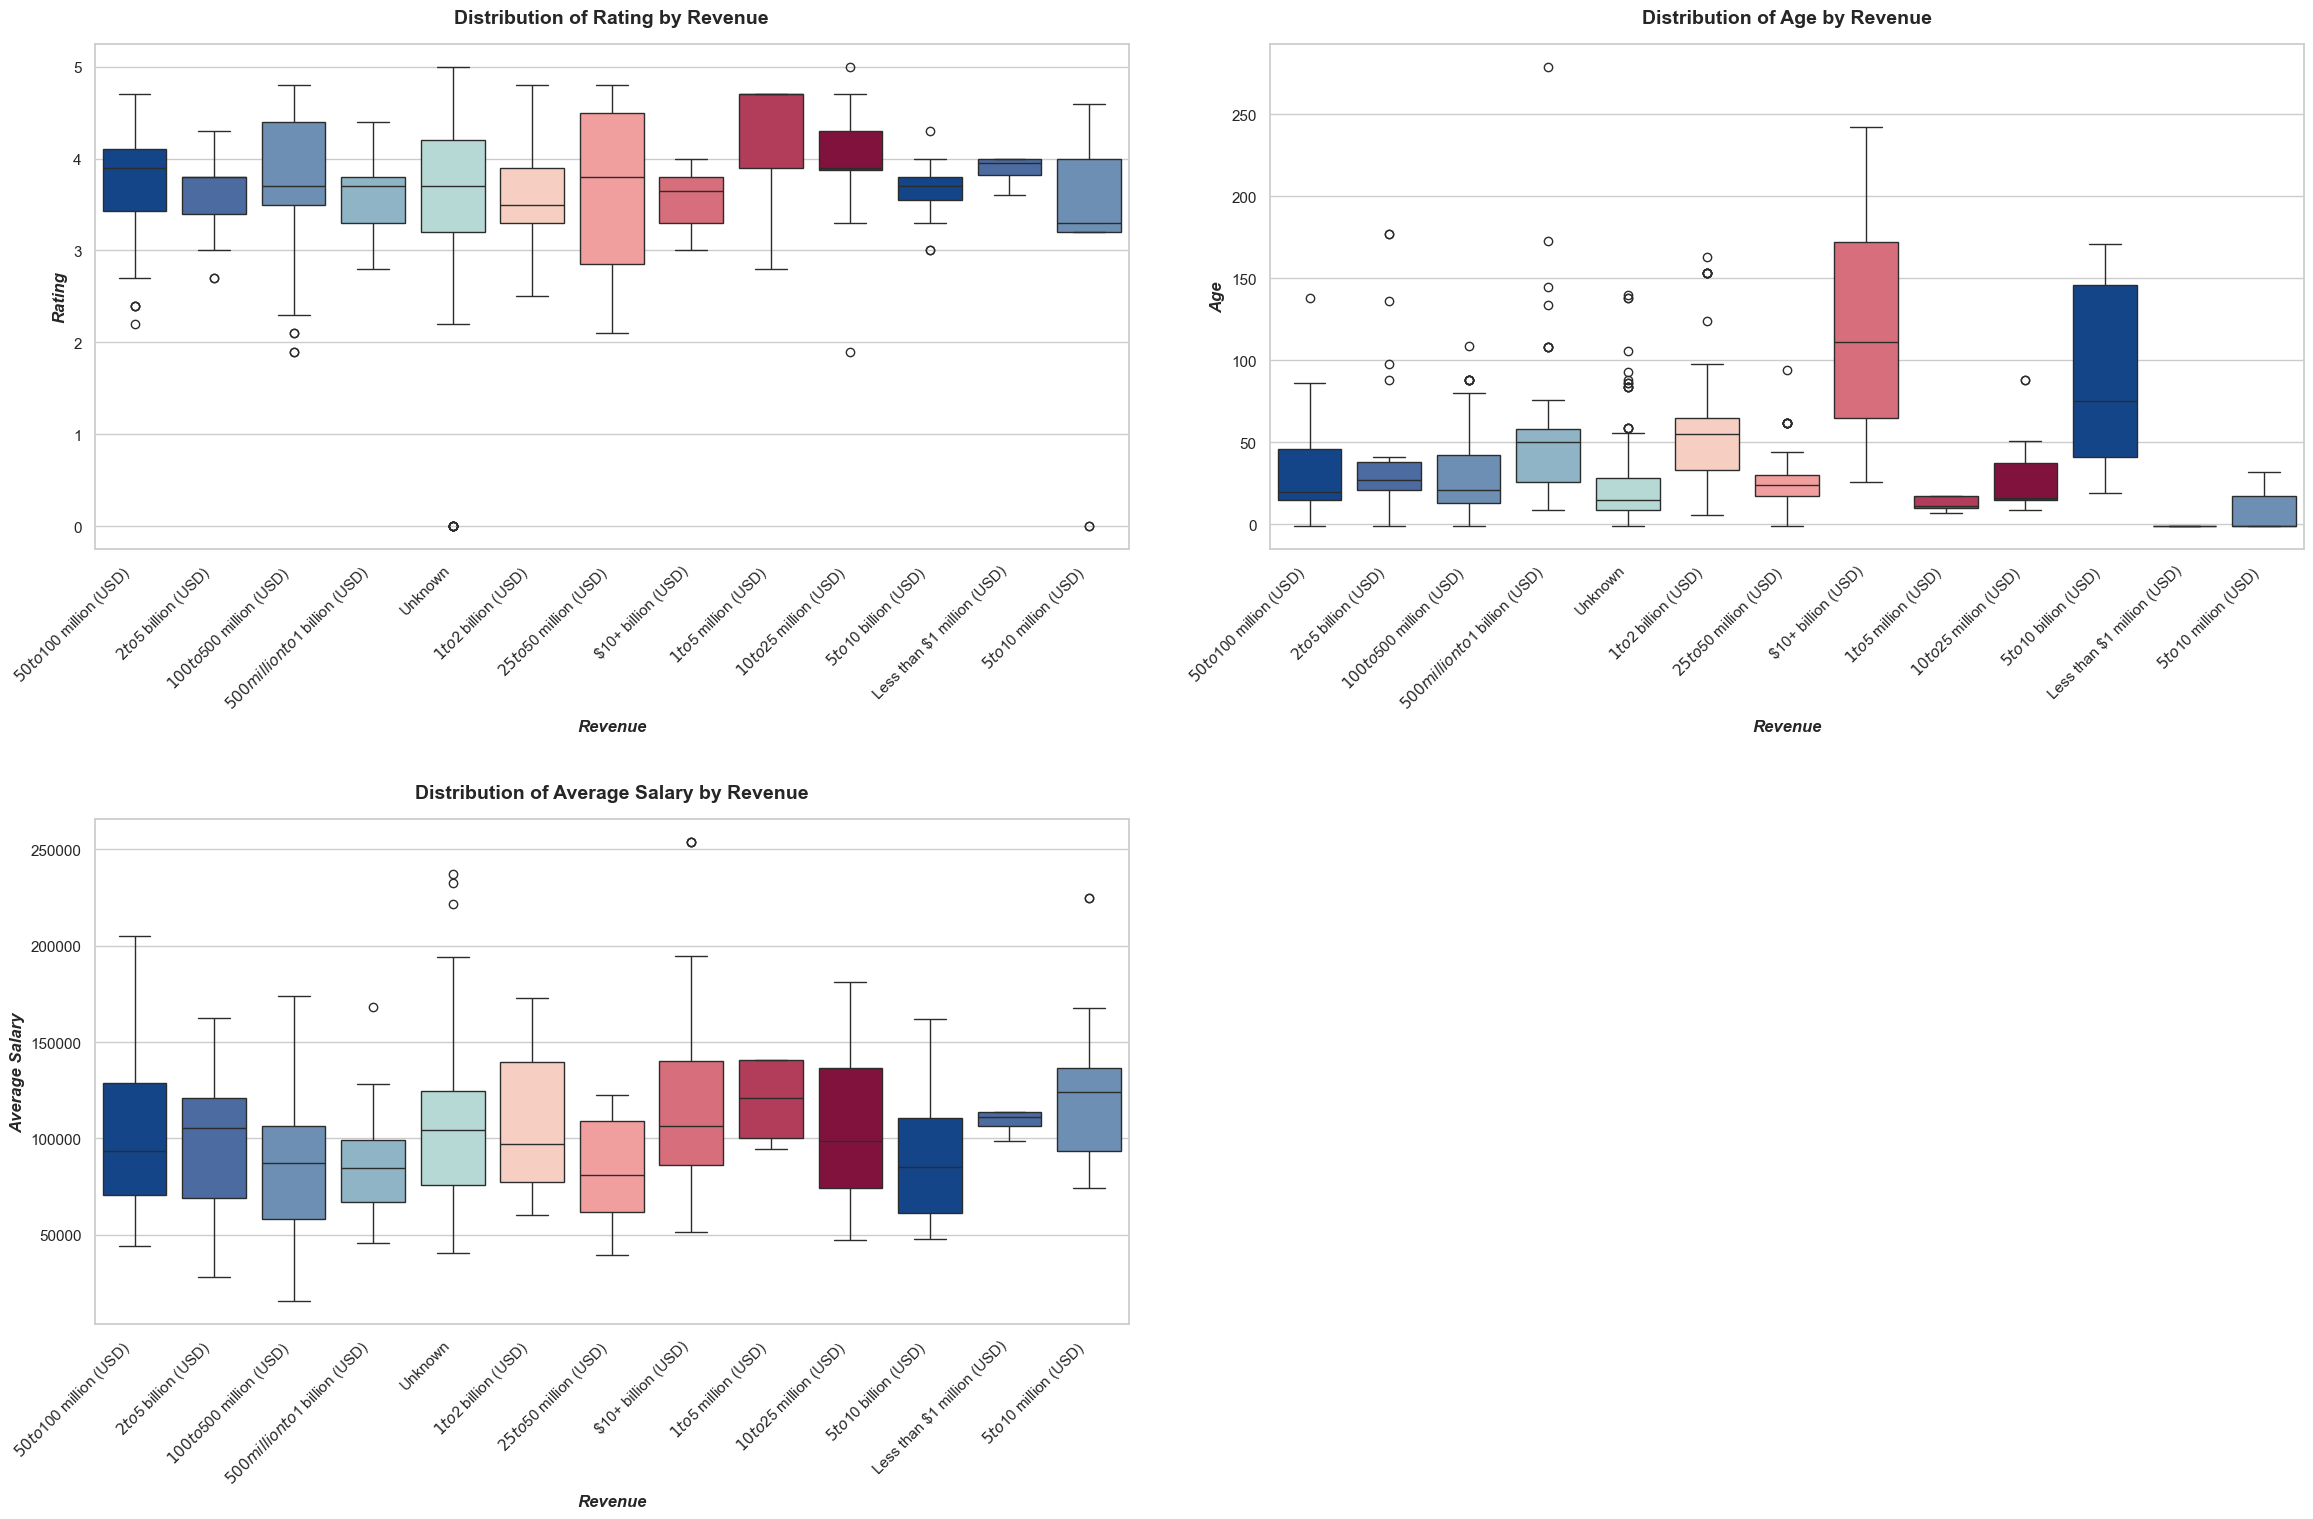

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(24, 16))

for col, ax in zip(['Rating', 'Age', 'Average Salary'], axes.ravel()):
    sns.boxplot(data=df, x='Revenue', y=col, ax=ax, palette=cmap10)

    ax.set_title(f'Distribution of {col} by Revenue', fontdict=font_tit, pad=15)
    ax.set_xlabel("Revenue", fontdict=font_ax)
    ax.set_ylabel(col, fontdict=font_ax)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

for ax in axes.ravel()[len(['Rating', 'Age', 'Average Salary']):]:
    ax.axis('off')

plt.tight_layout(pad=3)
plt.show()

## Company Performance Metrics by Revenue Tier

This section summarizes how **revenue levels** relate to key company attributes: **Rating**, **Age**, and **Salary**.

---

### 1. **Rating by Revenue Group**

#### 🔍 Key Observations:
- Companies with **higher revenue** tend to have **higher and more stable average ratings**.
- Companies with **low or undefined revenue** often have **lower and more volatile ratings**.

#### 💡 Conclusion:
- **Revenue positively correlates with rating stability and quality**.

---

### 2. **Company Age by Revenue Group**

#### 🔍 Key Observations:
- **High-revenue companies** generally have a **longer operational history**.
- **Small companies** or those with lower revenue tend to be **younger**.

#### 💡 Conclusion:
- **Established, older companies** are more likely to generate **higher revenue**.

---

### 3. **Salary by Revenue Group**

#### 🔍 Key Observations:
- **Large-revenue firms** offer **higher and more consistent average salaries**.
- **Small companies** tend to offer **lower salaries**, with **greater variability**.

#### 💡 Conclusion:
- **Higher revenue enables companies to maintain competitive and stable salary structures**.

---

### 🔚 Overall Insight:
- Across **rating**, **age**, and **salary**, **higher revenue** is a strong indicator of **company stability and quality**.
- **Smaller firms or those with limited revenue** often lag in these key metrics.


### **c. Skills group** (Python_yn, Spark, AWS_yn, Excel_yn, Tableau_yn, SQL_yn)

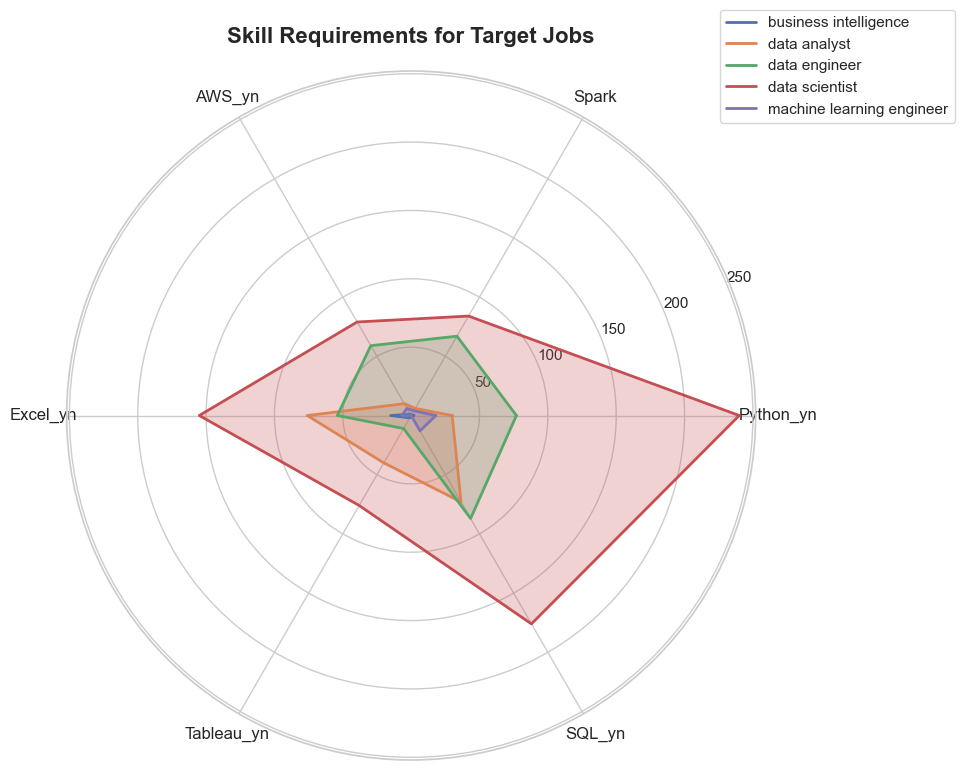

In [20]:
target_jobs     = ['data scientist', 'data analyst', 'data engineer', 'machine learning engineer', 'business intelligence']
required_skills = ['Python_yn', 'Spark', 'AWS_yn', 'Excel_yn', 'Tableau_yn', 'SQL_yn']

filtered_df = df[df['job_simplified'].isin(target_jobs)]
skill_counts = (
    filtered_df.groupby('job_simplified')[required_skills].sum()
)

categories = required_skills
num_vars = len(categories)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

for job in skill_counts.index:
    values = skill_counts.loc[job].values.flatten().tolist()
    values += values[:1]  
    ax.plot(angles, values, linewidth=2, label=job)
    ax.fill(angles, values, alpha=0.25)
    
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)

plt.title("Skill Requirements for Target Jobs", size=16, fontweight='bold', pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

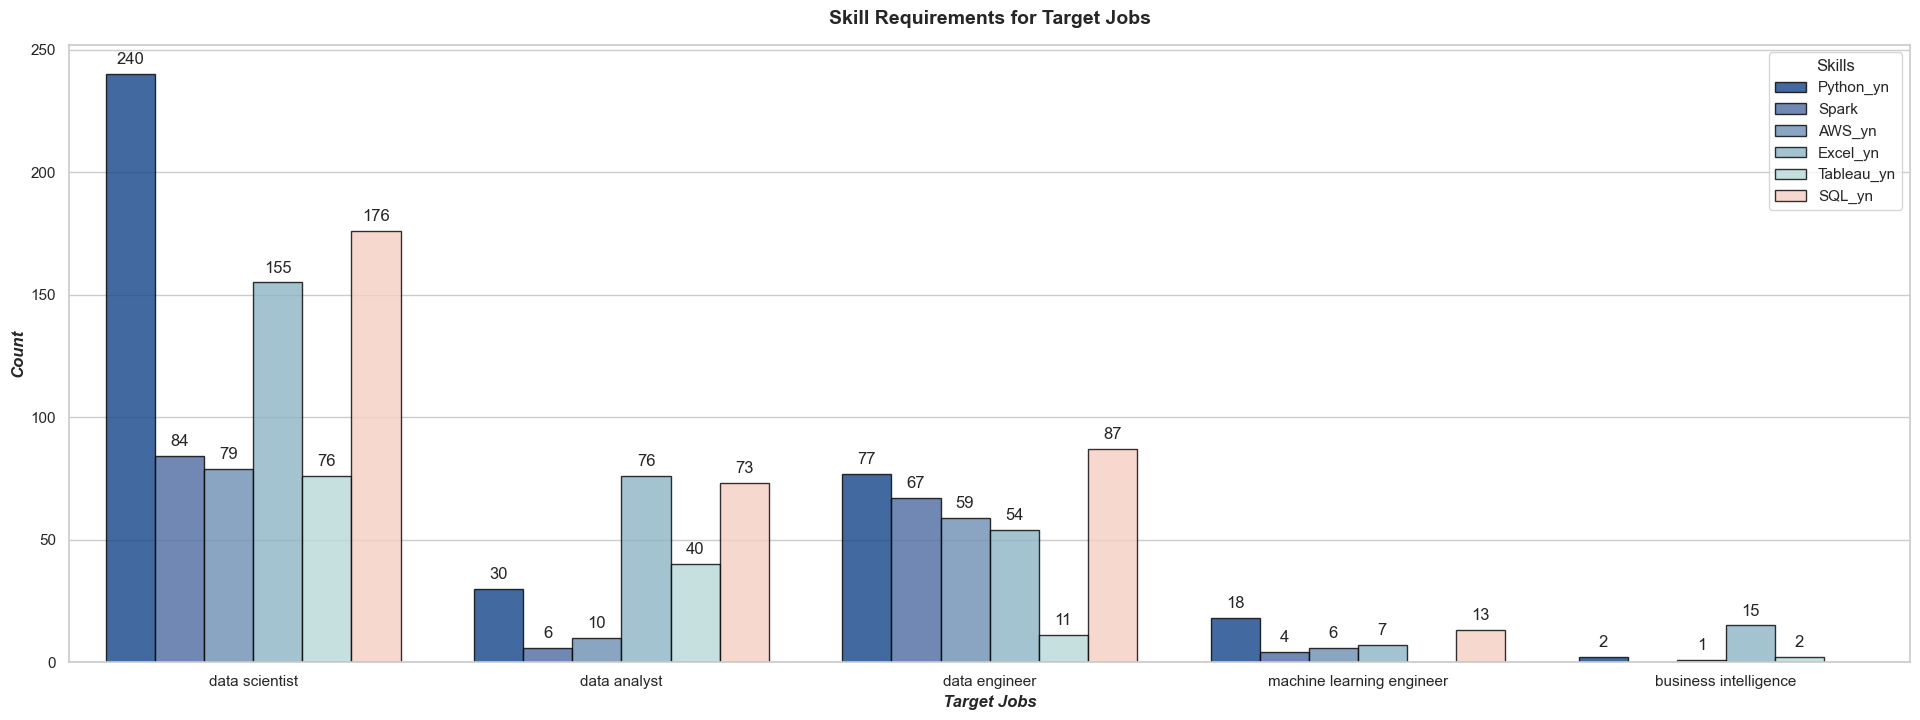

In [21]:
target_jobs     = ['data scientist', 'data analyst', 'data engineer', 'machine learning engineer', 'business intelligence']
required_skills = ['Python_yn', 'Spark', 'AWS_yn', 'Excel_yn', 'Tableau_yn', 'SQL_yn']

filtered_df = df[df['job_simplified'].isin(target_jobs)]
melted_df   = filtered_df.melt(id_vars='job_simplified', value_vars=required_skills, var_name='Skill', value_name='Required')
melted_df   = melted_df[melted_df['Required'] == 1]

plt.figure(figsize=(20, 8))
fg = sns.countplot(data=melted_df, x='job_simplified', hue='Skill', palette=cmap10, alpha=0.8, edgecolor='black')

plt.title("Skill Requirements for Target Jobs", fontdict=font_tit, pad=15)
plt.xlabel("Target Jobs", fontdict=font_ax)
plt.ylabel("Count", fontdict=font_ax)

for container in fg.containers:
    fg.bar_label(container, fmt='%d', label_type='edge', padding=5)

plt.legend(title="Skills")
plt.tight_layout(pad=3)
plt.show()

## Key Technical Skills by Data Job Role

This section outlines the most in-demand technical skills across various data-related roles, based on frequency of requirements.

---

### 1. **Role: Data Scientist**

#### 🔍 Key Observations:
- **Python**, **Excel**, and **SQL** are the top 3 essential skills.
- Secondary skills such as **AWS**, **Spark**, and **Tableau** are occasionally mentioned but less critical.

---

### 2. **Role: Data Analyst**

#### 🔍 Key Observations:
- **Excel** and **SQL** are the most frequently required skills.
- **Python** and **Tableau** are also relevant but slightly less emphasized.
- **AWS** and **Spark** appear less often in job requirements.

---

### 3. **Role: Data Engineer**

#### 🔍 Key Observations:
- **SQL** is the most important skill, followed by **Python**, **Spark**, and **AWS**.
- **Tableau** is rarely required for this role.

---

### 4. **Role: Machine Learning Engineer**

#### 🔍 Key Observations:
- **Python** is the dominant skill requirement.
- **SQL**, **AWS**, and **Spark** are relevant but mentioned less often compared to other roles.

---

### 5. **Role: Business Intelligence**

#### 🔍 Key Observations:
- **Excel** stands out as the primary skill requirement.

---

### 🔚 Overall Insight:
- **Python** and **SQL** are consistently among the most critical skills across most data-related roles, especially for **Data Scientists** and **Data Engineers**.
- **Excel** remains a core skill for business-focused roles and **Data Analysts**.


### **d. Location group** (job_state, Headquarters, Location, same_state)

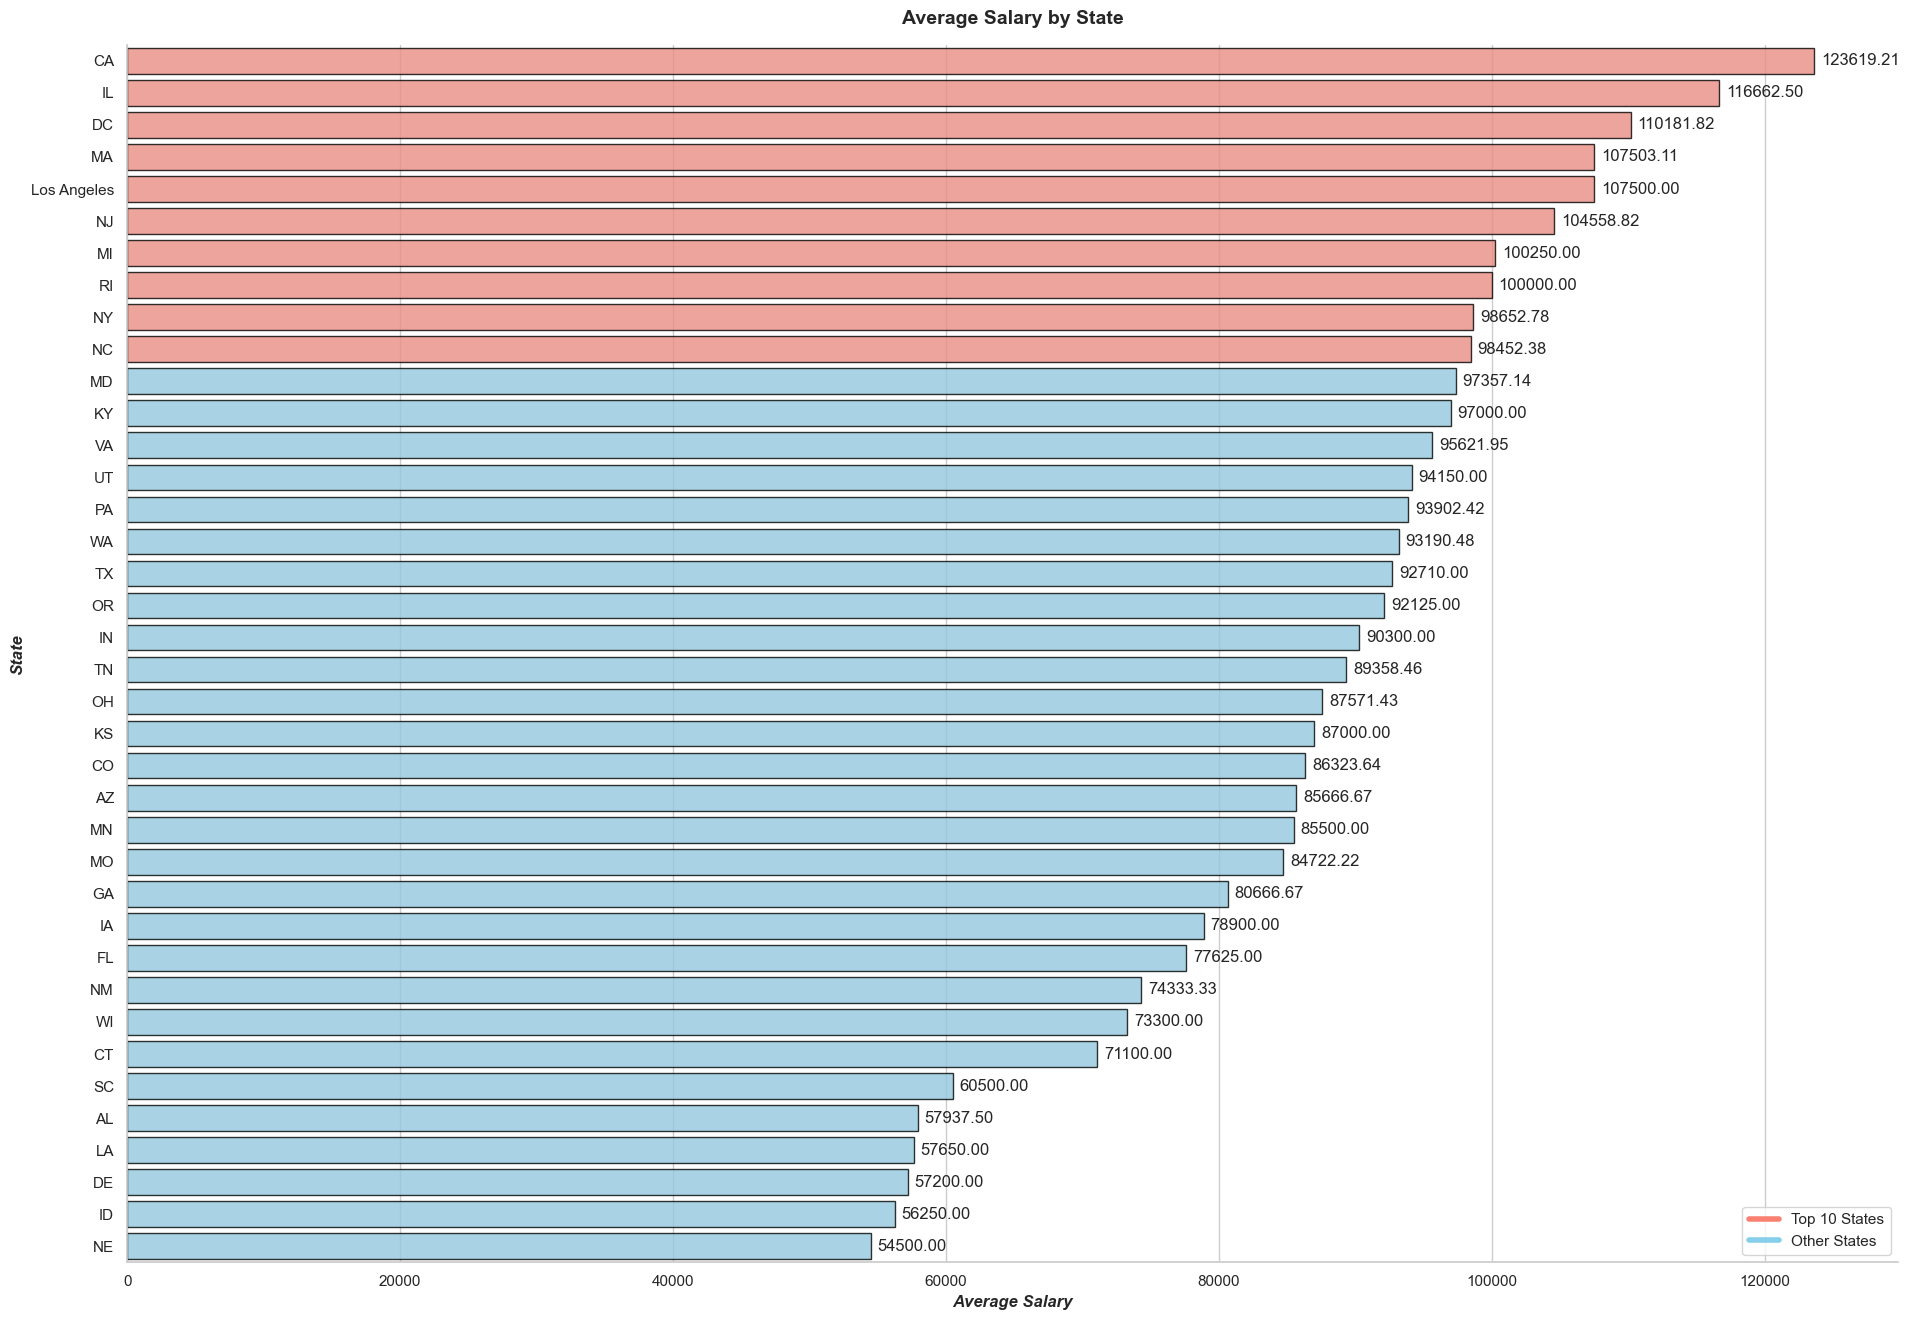

In [22]:
state_salary  = df.groupby('job_state')['Average Salary'].mean().sort_values(ascending=False)
top_10_states = state_salary.head(10).index

plt.figure(figsize=(20, 14))
colors = ['salmon' if state in top_10_states else 'skyblue' for state in state_salary.index]
fg     = sns.barplot(x=state_salary.values, y=state_salary.index, palette=colors, edgecolor='black', alpha=0.8)

plt.title('Average Salary by State', fontdict=font_tit, pad=15)
plt.xlabel('Average Salary', fontdict=font_ax)
plt.ylabel('State', fontdict=font_ax)

for container in fg.containers:
    fg.bar_label(container, fmt='%.2f', label_type='edge', padding=5)

top_patch   = plt.Line2D([0], [0], color='salmon' , lw=4, label='Top 10 States')
other_patch = plt.Line2D([0], [0], color='skyblue', lw=4, label='Other States')
plt.legend(handles=[top_patch, other_patch], loc='lower right')

sns.despine(top=True, right=True)
plt.tight_layout(pad=3)
plt.show()

## 💼 Average Salary by State

This section summarizes salary differences across U.S. states based on average annual compensation.

---

### 🔝 1. **Top 10 States with the Highest Average Salaries** (Highlighted in Red)

- **California (CA):** Leads the chart with an average salary of **$123,619.21**.
- Other top-ranking states include:
  - **Illinois (IL)**
  - **Washington D.C. (DC)**
  - **Massachusetts (MA)**
  - **New Jersey (NJ)**
- 💡 These states are major economic hubs, known for strong sectors in **technology**, **finance**, and **professional services**.

---

### 📉 2. **Remaining States** (Highlighted in Green)

- **Relatively High Salary States:** Maryland (MD), Virginia (VA), and Utah (UT) also report competitive salary levels.
- **Lowest Salary States:**
  - **Nebraska (NE):** Has the **lowest average salary** at **$54,500.00**.
  - **Idaho (ID)** and **Delaware (DE)** also fall into the lower salary group.

---

### 📊 3. **Overall Trends and Insights**

- **Large Disparity:** The highest-paying state (CA) pays **2.2 times** more than the lowest (NE).
- **Geographic Pattern:**
  - **Coastal and economically advanced states** tend to offer higher salaries.
  - **Inland and Southern states** typically have lower average compensation.

---

### 🧾 Final Conclusion

- **California** holds the top spot for salaries.
- **Nebraska** ranks at the bottom.
- **High-paying jobs** are predominantly located in states with **strong tech and financial ecosystems**.


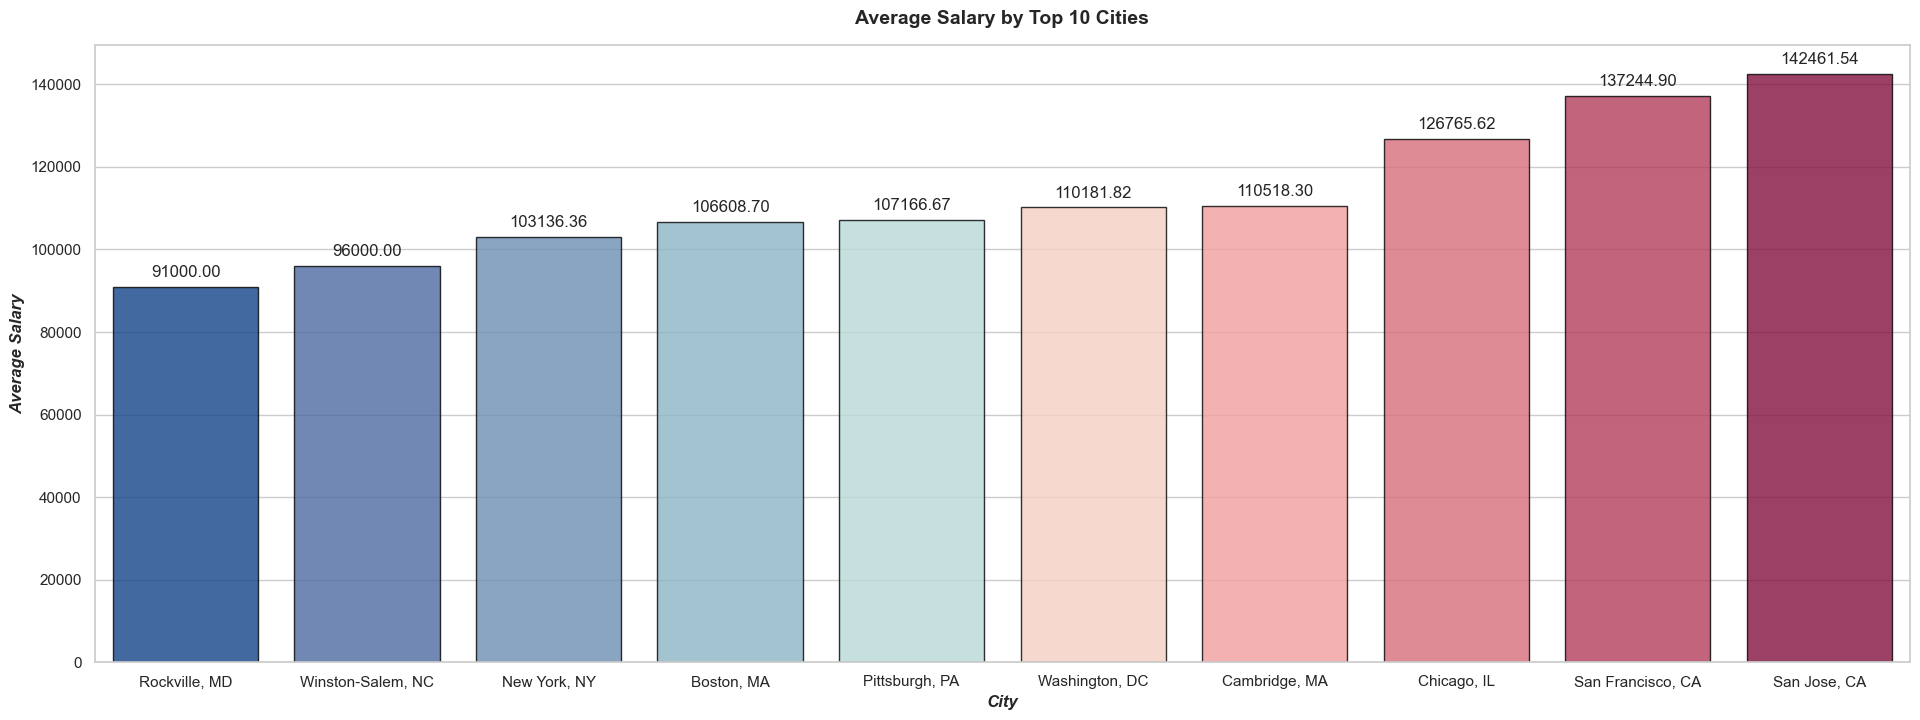

In [23]:
top_cities  = df['Location'].value_counts().head(10).index
city_salary = df[df['Location'].isin(top_cities)].groupby('Location')['Average Salary'].mean().sort_values()

plt.figure(figsize=(20, 8))
fg = sns.barplot(x=city_salary.index, y=city_salary.values, palette=cmap10, edgecolor='black', alpha=0.8)

plt.title('Average Salary by Top 10 Cities', fontdict=font_tit, pad=15)
plt.xlabel('City', fontdict=font_ax)
plt.ylabel('Average Salary', fontdict=font_ax)

for container in fg.containers:
    fg.bar_label(container, fmt='%.2f', label_type='edge', padding=5)

plt.tight_layout(pad=3)
plt.show()

## 🌆 Average Salary by Top 10 Cities

This section summarizes average annual salaries across the top 10 U.S. cities.

---

### 🥇 1. **City with the Highest Salary**

- **San Jose, CA:** Tops the list with an average salary of **$142,461.54**.
- **San Francisco, CA:** Follows closely with **$137,244.90**.
- 💡 Both are major **tech hubs**, home to companies like **Google**, **Apple**, and **Meta**.

---

### 💼 2. **Cities with High Average Salaries** ($100,000 - $130,000)

- **Chicago, IL**
- **Cambridge, MA**
- **Washington, DC**
- **Pittsburgh, PA**

These cities have thriving industries in **technology**, **finance**, and **education**.

---

### 📉 3. **Cities with Lower Average Salaries** (Below $100,000)

- **New York, NY:** **$103,136.36**, slightly above the threshold but lower than expected.
- **Winston-Salem, NC** and **Rockville, MD:** Both report salaries **below $100,000**.
- 📝 In cities like New York, income disparity and high living costs may contribute to a relatively lower average salary.

---

### 📊 4. **Overall Comparison**

- **San Jose, CA** earns the highest, with an average salary **1.5 times** greater than **Rockville, MD** (lowest: **~$91,000**).
- **California cities** continue to dominate, driven by a **strong tech-driven economy**.

---

### 🧾 Final Conclusion

- **San Jose** and **San Francisco** are the top choices for high-income opportunities.
- Cities like **Rockville** and **Winston-Salem** offer **lower average salaries**, but may offset with **lower cost of living**.


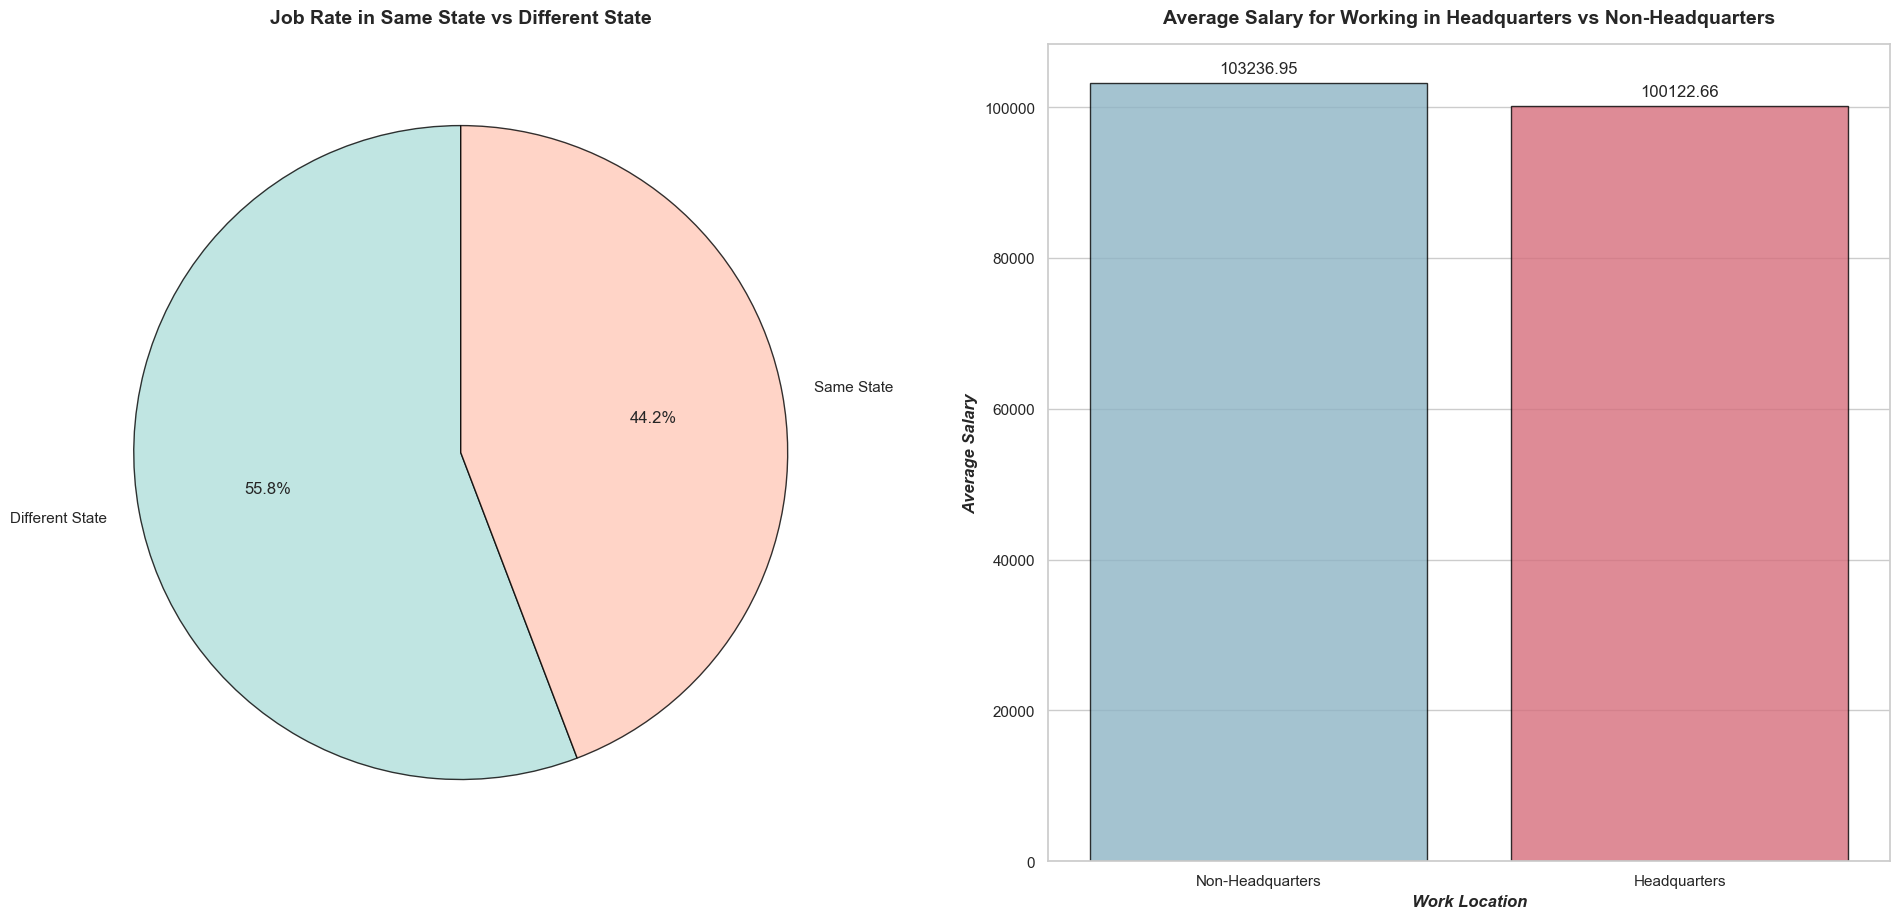

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

same_state_counts = df['same_state'].value_counts()

wedges, texts, autotexts = axes[0].pie(same_state_counts, labels=['Different State', 'Same State'],
            autopct='%1.1f%%', startangle=90,
            colors=cmap10[4:6], wedgeprops={'edgecolor': 'black'}
)
axes[0].set_title("Job Rate in Same State vs Different State", fontdict=font_tit, pad=15)

for wedge in wedges:
    wedge.set_alpha(0.8)

df['at_headquarters'] = (df['Location'] == df['Headquarters']).astype(int)
salary_comparison = df.groupby('at_headquarters')['Average Salary'].mean()

sns.barplot(x=salary_comparison.index, y=salary_comparison.values, ax=axes[1],
            palette=[cmap10[3], cmap10[-3]], alpha=0.8, edgecolor='black'
)
axes[1].set_title("Average Salary for Working in Headquarters vs Non-Headquarters", fontdict=font_tit, pad=15)
axes[1].set_xlabel("Work Location", fontdict=font_ax)
axes[1].set_ylabel("Average Salary", fontdict=font_ax)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["Non-Headquarters", "Headquarters"])

for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.2f', label_type='edge', padding=5)

plt.tight_layout(pad=3)
plt.show()

## 📍 Job Location Ratio by State & Average Salary

This section analyzes the distribution of jobs by location (in-state vs out-of-state) and compares corresponding average salaries.

---

### 🔢 1. **Job Location Ratio** (Left Pie Chart)

- **Out-of-State Jobs:** **55.8%** — the majority.  
  → Reflects the rise of **remote work** and **geographic flexibility** in hiring.

- **In-State Jobs:** **44.2%**  
  → Typically associated with roles that require **on-site presence** or proximity to company headquarters.

---

### 💰 2. **Average Salary** (Right Bar Chart)

- **Out-of-Headquarters Jobs:** **$103,236.95**  
- **Headquarters-Based Jobs:** **$100,122.66**  
  → A **salary gap of ~$3,114** in favor of out-of-headquarters roles.

#### Possible reasons:
- Differences in **cost of living** across states.
- Competitive compensation to **attract remote talent**.

---

### 🧾 Final Conclusion

- There is a clear **trend toward flexible and remote work**, with the majority of jobs offered **outside the company's state**.
- **Out-of-headquarters roles** offer **slightly higher average salaries**, indicating companies are adapting to a more **distributed workforce model**.

# **3. Feature Selection**

---

## **Correlation matrix**

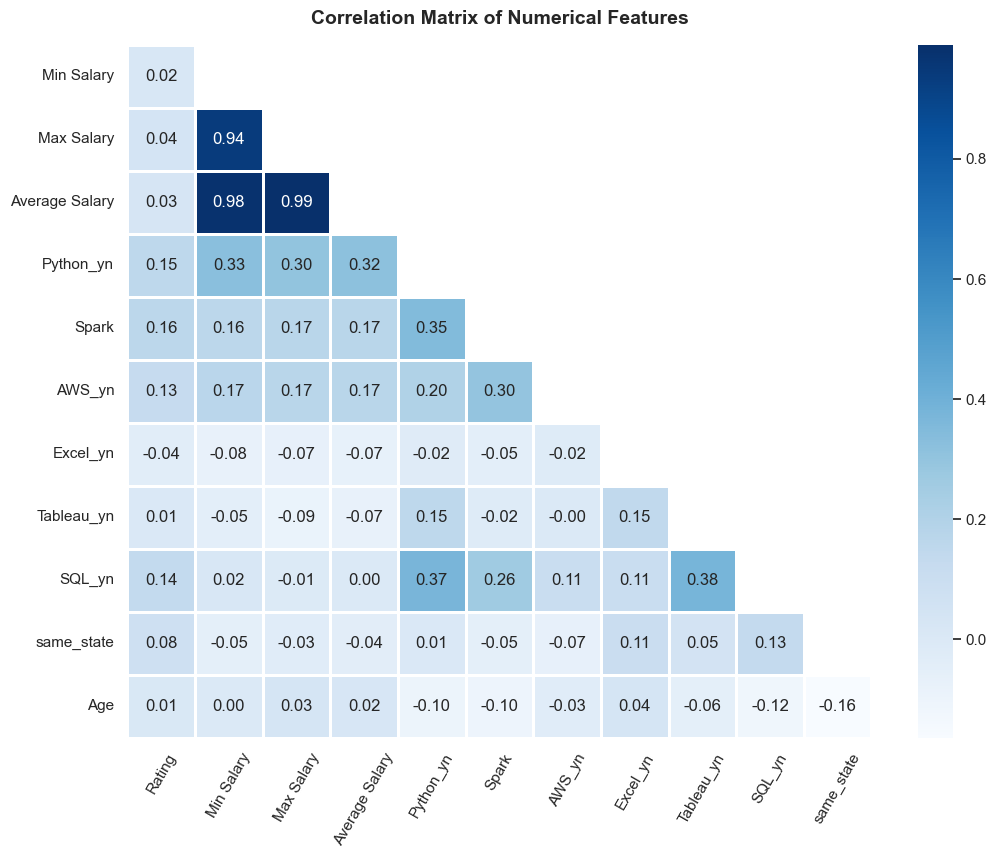

In [25]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[numerical_cols].corr().iloc[1:, :-1]
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

plt.figure(figsize=(12, 9))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues', cbar=True, linewidths=1)
plt.title("Correlation Matrix of Numerical Features", fontdict=font_tit, pad=15)
plt.xticks(rotation=60)

plt.grid(False)
plt.show()

## 📊 Correlation Matrix Analysis (Numerical Features)

This section summarizes the main correlations between salary and other numerical features, including technical skills and company attributes.

---

### 💸 1. **Strongest Correlation with Salary**

- **Min Salary, Max Salary, Average Salary**  
  → Extremely high correlation between these three values.  
  → ✅ Makes sense: **Average Salary** is calculated based on **Min** and **Max** salaries.

---

### 🧠 2. **Skills & Salary Correlation**

- **Python_yn:**  
  - Positive correlation with **Average Salary**: **0.32**  
  → Python proficiency **significantly improves salary**.

- **Spark:**  
  - Highest correlation with **Python** (**0.35**), and mild positive correlation with salary (**0.17**).

- **AWS_yn:**  
  - Positively correlated with **Spark** (**0.30**) and **Average Salary** (**0.17**).  
  → AWS knowledge adds some value to salary.

- **SQL_yn:**  
  - Correlates with **Python** (**0.37**) and **Tableau** (**0.38**), but **0.00 correlation with salary**.  
  → SQL is a foundational skill, but not a strong differentiator for salary.

- **Excel_yn, Tableau_yn:**  
  - Very weak or no correlation with salary  
  → These are **common baseline skills**, not major salary drivers.

---

### 🏢 3. **Work Location & Company Age**

- **same_state**, **at_headquarters:**  
  - Very low correlation with salary  
  → Job location **does not significantly affect** pay.

- **Company Age:**  
  - Extremely low correlation with salary (**0.02**)  
  → **Older companies** do not necessarily pay more.

---

### ✅ Final Conclusion

- **Salary** is mainly driven by **Min/Max Salary inputs** and **key technical skills** like **Python**, **Spark**, and **AWS**.
- **Python** stands out as the most impactful skill on compensation.
- **Job location** and **company age** have **minimal influence** on salary levels.

In [26]:
import scipy.stats as stats
anova_results = {}
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    groups = [df['Average Salary'][df[col] == group] for group in df[col].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    anova_results[col] = {'F-statistic': f_stat, 'p-value': p_value}

anova_results = pd.DataFrame.from_dict(anova_results, orient='index', columns=['F-statistic','p-value','Significance'])
anova_results['Significance'] = anova_results['p-value'] < 0.05
anova_results.sort_values(by='p-value')

F-statistic       p-value  Significance
Company Name          4.740723  4.549181e-48          True
job_simplified       24.894824  6.405628e-44          True
seniority            43.892767  4.572969e-33          True
Headquarters          3.234980  5.036396e-27          True
Location              2.978916  1.386686e-23          True
job_state             4.248494  9.027568e-15          True
Industry              3.265136  1.173209e-13          True
Type of ownership     7.725791  6.611024e-11          True
Sector                4.283655  7.908559e-11          True
Revenue               5.835820  1.011894e-09          True
Size                  5.868690  1.200392e-06          True
Rating Category       5.663335  1.712989e-04          True

## 🧪 ANOVA Analysis: Influence of Categorical Variables on Salary

This section summarizes the results of an ANOVA test evaluating the statistical significance of each categorical variable's impact on the dependent variable (typically Average Salary).

---

### 🔍 Key Variables & Observations

1. **Company Name**  
   - **F-statistic:** 4.74  
   - **p-value:** 4.55e-48 ✅  
   → The company has a **significant impact** on salary levels.

2. **Job Role (job_simplified)**  
   - **F-statistic:** 24.89 (highest)  
   - **p-value:** 6.41e-44 ✅  
   → This is the **most influential variable** on salary.

3. **Seniority Level (seniority)**  
   - **F-statistic:** 42.36  
   - **p-value:** 5.35e-32 ✅  
   → Seniority has a **strong effect** on salary.

4. **Headquarters (at_headquarters)**  
   - **F-statistic:** 3.23  
   - **p-value:** 5.04e-27 ✅  
   → Location of HQ is also **statistically significant**.

5. **Job Location (Location)**  
   - **F-statistic:** 2.98  
   - **p-value:** 1.39e-23 ✅  
   → Job location has a **notable effect**.

6. **Job State (job_state)**  
   - **F-statistic:** 4.25  
   - **p-value:** 9.03e-15 ✅  
   → State of employment significantly impacts salary.

7. **Industry**  
   - **F-statistic:** 3.27  
   - **p-value:** 1.17e-13 ✅  
   → Industry is **statistically important**.

8. **Type of Ownership**  
   - **F-statistic:** 7.73  
   - **p-value:** 6.61e-11 ✅  
   → Ownership structure **strongly affects** salary.

9. **Sector**  
   - **F-statistic:** 4.28  
   - **p-value:** 7.91e-11 ✅  
   → Sectoral differences contribute to salary variation.

10. **Revenue**  
   - **F-statistic:** 5.84  
   - **p-value:** 1.01e-09 ✅  
   → Company revenue level **clearly impacts** salary.

11. **Company Size**  
   - **F-statistic:** 5.87  
   - **p-value:** 1.20e-06 ✅  
   → Larger companies tend to offer different pay scales.

12. **Rating Category**  
   - **F-statistic:** 5.66  
   - **p-value:** 1.71e-04 ✅  
   → Company rating is also **statistically relevant**.

---

### ✅ Final Conclusion:

- All categorical variables examined show **statistically significant influence** on salary (p-value < 0.05).  
- The **most impactful factors** are: **job role**, **seniority**, and **company name**.  
- Organizational and locational characteristics such as **sector**, **revenue**, and **headquarters** also play an important role.


In [28]:
data_model = df[['Company Name', 'Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'job_simplified', 'seniority', 'Rating Category', 'job_state','Python_yn', 'Spark', 'AWS_yn','Average Salary']]
data_model.to_csv('dataset/training_data.csv', index=False)